# Introduction

## Train Multiple Models

Now that we have done feature engineering on the dataset, the next step is to train the data on different regression models.
The models we will be using are the following:
- **Linear Regression**
- **Decision Tree**
- **Adaboost Regressor**
- **Random Forest**

For each model, there will be a training and parameter tuning phase, and a predictions phase.
Results of the predictions are then plotted and visualized.

# Setup
Let us import the required modules.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
import joblib

import project.src.feat_eng as fe
import project.src.visualization as viz
import project.src.evaluation as eva

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline
sys.path.insert(0, os.path.abspath("../../"))
color = sns.color_palette()
pd.set_option("display.max_columns", 100)

RNDSTATE = 30

## Load Data
Note that the dataset is already split into Train-Test sets.

In [3]:
engineered_dataset = fe.TrainTestSplit.from_csv_directory(dir_path="../data/lvl4_rfecv")

In [4]:
engineered_dataset.x_train.info()
engineered_dataset.y_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62090 entries, 0 to 62089
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   62090 non-null  float64
 1   bedroomcnt                    62090 non-null  float64
 2   fireplacecnt                  62090 non-null  float64
 3   garagecarcnt                  62090 non-null  float64
 4   latitude                      62090 non-null  float64
 5   longitude                     62090 non-null  float64
 6   poolcnt                       62090 non-null  float64
 7   roomcnt                       62090 non-null  float64
 8   threequarterbathnbr           62090 non-null  float64
 9   unitcnt                       62090 non-null  float64
 10  numberofstories               62090 non-null  float64
 11  house_age                     62090 non-null  float64
 12  airconditioningtypeid_1.0     62090 non-null  float64
 13  b

array([-0.04060104,  0.00803361,  0.04714126, ..., -0.02798657,
        0.03477351,  0.00171659])

# Linear Regression Model

In [5]:
linear_reg = LinearRegression()
linear_reg.fit(engineered_dataset.x_train, engineered_dataset.y_train)

LinearRegression()

In [6]:
linreg_train_pred = linear_reg.predict(engineered_dataset.x_train)
linreg_test_pred = linear_reg.predict(engineered_dataset.x_test)

linreg_train_eval = eva.Evaluation(y_real=engineered_dataset.y_train, y_pred=linreg_train_pred)
linreg_test_eval = eva.Evaluation(y_real=engineered_dataset.y_test, y_pred=linreg_test_pred)

In [7]:
print("Training:")
linreg_train_eval.print_eval()
print("Testing:")
linreg_test_eval.print_eval()

Training:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.07041153246114866
Mean Squared Error : 0.028827755428801553
Root Mean Squared Error : 0.1697873830082835

Testing:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.0721586173392606
Mean Squared Error : 0.030189761313624365
Root Mean Squared Error : 0.17375201096282128



In [8]:
lr_model = eva.EvaluatedModel(linear_reg, train_eval=linreg_train_eval, test_eval=linreg_test_eval)

# Decision Tree Regression Model

In [ ]:
# automatic parameters tuning
dt=DecisionTreeRegressor(random_state=RNDSTATE)
properties={
            'min_samples_leaf':[x for x in range(2,251,2)],
            'max_leaf_nodes':[x for x in range(2,51,2)],
            'max_features': ["sqrt", "log2"]
            }

tuned_dt=GridSearchCV(dt,properties,scoring="neg_mean_squared_error",cv=5,return_train_score=True,verbose=2,n_jobs=-1)
tuned_dt.fit(engineered_dataset.x_train,engineered_dataset.y_train)

print ("Best Score: {:.3f}".format(tuned_dt.best_score_) )
print ("Best Params: ", tuned_dt.best_params_)

In [14]:
# save results
# if not os.path.exists('../../tuned_models'):
#     os.mkdir('../../tuned_models')
# joblib.dump(tuned_dt, '../../tuned_models/dectree_tuning_results.pkl')

['../../tuned_models/dectree_tuning_results.pkl']

In [9]:
# to load previously saved results
tuned_dt = joblib.load("../../tuned_models/dectree_tuning_results.pkl")

In [10]:
print(tuned_dt.cv_results_)
tuned_dt_results = pd.DataFrame( tuned_dt.cv_results_ )

{'mean_fit_time': array([0.1609551 , 0.14577188, 0.12597051, ..., 0.19744368, 0.28712368,
       0.26192627]), 'std_fit_time': array([0.02996537, 0.01828229, 0.02142953, ..., 0.08146761, 0.05182752,
       0.09736596]), 'mean_score_time': array([0.00996442, 0.01900754, 0.01394172, ..., 0.02358508, 0.02061849,
       0.00906968]), 'std_score_time': array([0.00960627, 0.00934228, 0.00782639, ..., 0.02055245, 0.02549226,
       0.00599626]), 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', ..., 'log2', 'log2', 'log2'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_leaf_nodes': masked_array(data=[2, 2, 2, ..., 50, 50, 50],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[2, 4, 6, ..., 246, 248, 250],
             mask=[False, False, False, ..., False, False, False],
       fill_valu

In [11]:
tuned_dt_results[["mean_test_score","mean_train_score"]]

mean_test_score  mean_train_score
0           -0.028965         -0.028885
1           -0.028965         -0.028885
2           -0.028965         -0.028885
3           -0.028965         -0.028885
4           -0.028965         -0.028885
...               ...               ...
6245        -0.028988         -0.028698
6246        -0.028987         -0.028698
6247        -0.028995         -0.028691
6248        -0.028981         -0.028697
6249        -0.028974         -0.028693

[6250 rows x 2 columns]

In [12]:
print(tuned_dt.best_estimator_)
print(tuned_dt.best_score_)

DecisionTreeRegressor(max_features='sqrt', max_leaf_nodes=6,
                      min_samples_leaf=228, random_state=30)
-0.028891499864951785


In [13]:
test_acc = mean_squared_error(y_true = engineered_dataset.y_train,
                          y_pred = tuned_dt.predict(engineered_dataset.x_train) )
print ("Train Accuracy: {}".format(test_acc) )

Train Accuracy: 0.028837933699217402


In [14]:
# best parameters from automatic parameters tuning
tree_reg = DecisionTreeRegressor(**tuned_dt.best_params_)
tree_reg.fit(engineered_dataset.x_train, engineered_dataset.y_train)

DecisionTreeRegressor(max_features='sqrt', max_leaf_nodes=6,
                      min_samples_leaf=228)

In [15]:
dtreg_train_pred = tree_reg.predict(engineered_dataset.x_train)
dtreg_test_pred = tree_reg.predict(engineered_dataset.x_test)

dtreg_train_eval = eva.Evaluation(y_real=engineered_dataset.y_train, y_pred=dtreg_train_pred)
dtreg_test_eval = eva.Evaluation(y_real=engineered_dataset.y_test, y_pred=dtreg_test_pred)

In [16]:
print("Training:")
dtreg_train_eval.print_eval()
print("Testing:")
dtreg_test_eval.print_eval()

Training:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.07036375181849802
Mean Squared Error : 0.028847551123233502
Root Mean Squared Error : 0.16984566854422134

Testing:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.07195294644592011
Mean Squared Error : 0.030192050368611573
Root Mean Squared Error : 0.1737585979703208



In [17]:
dtr_model = eva.EvaluatedModel(tree_reg, train_eval=dtreg_train_eval, test_eval=dtreg_test_eval)

# AdaBoost Regression Model

In [84]:
# automatic parameters tuning
abreg=AdaBoostRegressor(random_state=RNDSTATE)
properties={
    'base_estimator':[tree_reg],
    'n_estimators':[x for x in range(1,50,2)],
    'learning_rate':[0.001,0.01,0.1,1,10,100]
}

tuned_abreg=GridSearchCV(abreg,properties,scoring="neg_mean_squared_error",cv=5,return_train_score=True,verbose=4,n_jobs=-1)
tuned_abreg.fit(engineered_dataset.x_train,engineered_dataset.y_train)

print ("Best Score: {:.3f}".format(tuned_abreg.best_score_) )
print ("Best Params: ", tuned_abreg.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=6; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=6; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=10; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=10; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=12; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=14; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=16; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=16; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=18; total time=   0.2s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=18; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=22; t

In [85]:
# save results
# if not os.path.exists('../../tuned_models'):
#     os.mkdir('../../tuned_models')
# joblib.dump(tuned_abreg, '../../tuned_models/adaboost_tuning_results.pkl')

['../../tuned_models/adaboost_tuning_results.pkl']

In [18]:
# to load previously saved results
tuned_abreg = joblib.load("../../tuned_models/adaboost_tuning_results.pkl")

In [19]:
print(tuned_abreg.cv_results_)
tuned_abreg_results = pd.DataFrame( tuned_abreg.cv_results_ )

{'mean_fit_time': array([0.15940957, 0.35163865, 0.56928492, 1.57303262, 2.29171615,
       1.67224679, 2.09967132, 3.0315249 , 3.06097922, 5.18926067,
       6.96911221, 5.30459924, 6.38320808, 3.70532923, 3.67236052,
       4.25988922, 4.00112228, 3.86032262, 4.42720327, 4.52056894,
       4.8555666 , 5.24229445, 5.44544282, 5.40931563, 5.62443056,
       0.13798761, 0.39922256, 0.68121686, 0.80511031, 0.97674236,
       1.30428219, 1.68239274, 1.751053  , 1.77959809, 2.41863661,
       2.30933614, 2.8271945 , 3.05860939, 3.5029356 , 3.14432411,
       3.79089866, 4.13584237, 5.69630809, 4.60515242, 4.56333799,
       5.26325979, 5.01982465, 6.20661588, 5.90951862, 5.72163529,
       0.19029779, 0.37859435, 0.67703924, 1.00878448, 1.60031519,
       1.48199496, 1.39870219, 1.63109331, 2.22465529, 2.16405826,
       5.39346638, 6.17613878, 5.49562922, 6.80243969, 4.99677358,
       3.74513502, 4.10830197, 4.18002362, 4.21201105, 4.73722391,
       4.76126337, 5.1984231 , 4.99637213, 6

In [20]:
tuned_abreg_results[["param_n_estimators","mean_test_score","mean_train_score"]]

param_n_estimators  mean_test_score  mean_train_score
0                    1        -0.028979         -0.028905
1                    3        -0.028906         -0.028852
2                    5        -0.028888         -0.028853
3                    7        -0.028888         -0.028843
4                    9        -0.028887         -0.028840
..                 ...              ...               ...
145                 41        -3.271964         -3.272051
146                 43        -3.271964         -3.272051
147                 45        -3.271964         -3.272051
148                 47        -3.271964         -3.272051
149                 49        -3.271964         -3.272051

[150 rows x 3 columns]

In [21]:
print(tuned_abreg.best_estimator_)
print(tuned_abreg.best_score_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features='sqrt',
                                                       max_leaf_nodes=6,
                                                       min_samples_leaf=228),
                  learning_rate=0.001, n_estimators=25, random_state=30)
-0.02888395680192074


In [22]:
test_acc = mean_squared_error(y_true = engineered_dataset.y_train,
                          y_pred = tuned_abreg.predict(engineered_dataset.x_train) )
print ("Train Accuracy: {}".format(test_acc) )

Train Accuracy: 0.028862077999012446


In [23]:
# best parameters from automatic parameters tuning
adaboost_reg = AdaBoostRegressor(**tuned_abreg.best_params_)
adaboost_reg.fit(engineered_dataset.x_train, engineered_dataset.y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features='sqrt',
                                                       max_leaf_nodes=6,
                                                       min_samples_leaf=228),
                  learning_rate=0.001, n_estimators=25)

In [24]:
adaboostreg_train_pred = adaboost_reg.predict(engineered_dataset.x_train)
adaboostreg_test_pred = adaboost_reg.predict(engineered_dataset.x_test)

adaboostreg_train_eval = eva.Evaluation(y_real=engineered_dataset.y_train, y_pred=adaboostreg_train_pred)
adaboostreg_test_eval = eva.Evaluation(y_real=engineered_dataset.y_test, y_pred=adaboostreg_test_pred)

In [25]:
print("Training:")
adaboostreg_train_eval.print_eval()
print("Testing:")
adaboostreg_test_eval.print_eval()

Training:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.06995709692108856
Mean Squared Error : 0.028858367961692902
Root Mean Squared Error : 0.16987750869874713

Testing:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.07170080320683084
Mean Squared Error : 0.030206409589653992
Root Mean Squared Error : 0.1737999125133669



In [26]:
abr_model = eva.EvaluatedModel(adaboost_reg, train_eval=adaboostreg_train_eval, test_eval=adaboostreg_test_eval)

# Random Forest Regression Model

In [19]:
# automatic parameters tuning
rfreg=RandomForestRegressor(random_state=RNDSTATE)
properties={
    "n_estimators": [x for x in range(50,251,50)],
    "min_samples_leaf": [x for x in range(180,251,7)],
    "max_leaf_nodes": [x for x in range(14,71,14)],
    "max_features": ["sqrt"]
}

tuned_rfreg=GridSearchCV(rfreg,properties,scoring="neg_mean_squared_error",cv=5,return_train_score=True,verbose=4,n_jobs=-1)
tuned_rfreg.fit(engineered_dataset.x_train,engineered_dataset.y_train)

print ("Best Score: {:.3f}".format(tuned_rfreg.best_score_) )
print ("Best Params: ", tuned_rfreg.best_params_)

Fitting 5 folds for each of 275 candidates, totalling 1375 fits
[CV 1/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=50;, score=(train=-0.028, test=-0.030) total time=   9.5s
[CV 1/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=100;, score=(train=-0.028, test=-0.030) total time=  17.9s
[CV 5/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=100;, score=(train=-0.029, test=-0.029) total time=  19.3s
[CV 4/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=150;, score=(train=-0.029, test=-0.030) total time=  22.5s
[CV 3/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=200;, score=(train=-0.029, test=-0.027) total time=  27.3s
[CV 2/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=250;, score=(train=-0.029, test=-0.027) total time=  31.3s
[CV 1/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf

In [94]:
# save results
# if not os.path.exists('../../tuned_models'):
#     os.mkdir('../../tuned_models')
# joblib.dump(tuned_rfreg, '../../tuned_models/randforest_tuning_results.pkl')

['../../tuned_models/randforest_tuning_results.pkl']

In [27]:
# to load previously saved results
tuned_rfreg = joblib.load("../../tuned_models/randforest_tuning_results.pkl")

In [28]:
print(tuned_rfreg.cv_results_)
tuned_rfreg_results = pd.DataFrame( tuned_rfreg.cv_results_ )

{'mean_fit_time': array([ 9.47909679, 18.04069352, 24.69227419, 25.97859106, 31.73114924,
        6.31311083, 12.74888687, 17.31801357, 24.73737283, 36.24359202,
        7.80755196, 16.61648455, 26.99143677, 27.7211915 , 40.138515  ,
        7.2412734 , 14.98957548, 18.21076488, 28.62794123, 39.28791614,
        8.68259368, 13.32124362, 20.03441467, 27.78817477, 35.55612602,
        6.28777833, 16.34725375, 25.04945636, 31.82090964, 38.60272856,
        9.19957881, 15.81195216, 18.11464701, 31.7199214 , 37.12913456,
        6.68262987, 17.80455823, 23.32400799, 33.47026596, 42.22273488,
        8.49761715, 11.90050192, 16.35446973, 32.54710369, 37.45405293,
        7.36069236, 13.26392603, 28.46114821, 33.93642955, 43.91334925,
       11.69853287, 17.3264214 , 22.46759949, 30.27936039, 37.88884139,
       10.56966772, 20.83272491, 31.52619252, 40.35232844, 43.41459928,
        9.68335662, 21.48181162, 30.14992862, 32.12362485, 47.11560082,
       10.35221739, 21.94795637, 26.38767638, 

In [29]:
tuned_rfreg_results[["param_n_estimators","mean_test_score","mean_train_score"]]

param_n_estimators  mean_test_score  mean_train_score
0                   50        -0.028838         -0.028708
1                  100        -0.028832         -0.028704
2                  150        -0.028835         -0.028701
3                  200        -0.028837         -0.028702
4                  250        -0.028837         -0.028702
..                 ...              ...               ...
270                 50        -0.028798         -0.028484
271                100        -0.028789         -0.028481
272                150        -0.028795         -0.028480
273                200        -0.028783         -0.028479
274                250        -0.028789         -0.028481

[275 rows x 3 columns]

In [30]:
print(tuned_rfreg.best_estimator_)
print(tuned_rfreg.best_score_)

RandomForestRegressor(max_features='sqrt', max_leaf_nodes=70,
                      min_samples_leaf=250, n_estimators=200)
-0.02878311305984198


In [31]:
test_acc = mean_squared_error(y_true = engineered_dataset.y_train,
                          y_pred = tuned_rfreg.predict(engineered_dataset.x_train) )
print ("Train Accuracy: {}".format(test_acc) )

Train Accuracy: 0.028502289288850676


In [32]:
# best parameters from automatic parameters tuning
forest_reg = RandomForestRegressor(**tuned_rfreg.best_params_)
forest_reg.fit(engineered_dataset.x_train, engineered_dataset.y_train)

RandomForestRegressor(max_features='sqrt', max_leaf_nodes=70,
                      min_samples_leaf=250, n_estimators=200)

In [33]:
rfreg_train_pred = forest_reg.predict(engineered_dataset.x_train)
rfreg_test_pred = forest_reg.predict(engineered_dataset.x_test)

rfreg_train_eval = eva.Evaluation(y_real=engineered_dataset.y_train, y_pred=rfreg_train_pred)
rfreg_test_eval = eva.Evaluation(y_real=engineered_dataset.y_test, y_pred=rfreg_test_pred)

In [34]:
print("Training:")
rfreg_train_eval.print_eval()
print("Testing:")
rfreg_test_eval.print_eval()

Training:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.06982438542987539
Mean Squared Error : 0.028502018303301988
Root Mean Squared Error : 0.16882540775399296

Testing:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.07178784660837992
Mean Squared Error : 0.030044114469832232
Root Mean Squared Error : 0.17333238148087687



In [36]:
rfr_model = eva.EvaluatedModel(forest_reg, train_eval=rfreg_train_eval, test_eval=rfreg_test_eval)

# Performance Visualization

### Setup

In [37]:
def rank_model(is_test: bool):
    # ranking based on mse
    models=[lr_model, dtr_model, abr_model, rfr_model]
    min_mse=None
    mse=None

    for i,m in enumerate(models):
        if is_test:
            if i==0:
                min_mse=m
                mse = m.test_eval.mse
            if mse > m.test_eval.mse:
                min_mse=m
                mse = m.test_eval.mse
        else:
            if i==0:
                min_mse=m
                mse = m.train_eval.mse
            if mse > m.train_eval.mse:
                min_mse=m
                mse = m.train_eval.mse

    return min_mse.model, mse

In [38]:
def get_performance_df(results: dict[str, list[eva.EvaluatedModel]]):
    perf_records = []
    for model_name, evalu in results.items():
        record = {
            "model": model_name,
            "MAE": evalu.mae,
            "MSE": evalu.mse,
            "RMSE": evalu.rmse}
        perf_records.append(record)

    return pd.DataFrame.from_records(data=perf_records)

In [39]:
def performance_plot(performance_df: pd.DataFrame):
    sns.set(rc={"figure.figsize":(8, 4)})
    plot = sns.lineplot(data=performance_df, x="model", y="MSE", hue="model",style="model", palette="bright", markers=True)
    plot.tick_params(axis="x", rotation=90)

    return plot

In [40]:
# all results
train_evals = {
    "[Training] Linear Regression": lr_model.train_eval,
    "[Training] Decision Tree Regression": dtr_model.train_eval,
    "[Training] AdaBoost Regression": abr_model.train_eval,
    "[Training] Random Forest Regression": rfr_model.train_eval
}
test_evals = {
    "[Testing] Linear Regression": lr_model.test_eval,
    "[Testing] Decision Tree Regression": dtr_model.test_eval,
    "[Testing] AdaBoost Regression": abr_model.test_eval,
    "[Testing] Random Forest Regression": rfr_model.test_eval
}

## Best Performing Model

In [48]:
m, mse = rank_model(is_test=True)
print("Best Model on Test: {} \nwith mse: {}".format(m,mse))

Best Model on Test: RandomForestRegressor(max_features='sqrt', max_leaf_nodes=70,
                      min_samples_leaf=250, n_estimators=200) 
with mse: 0.030044114469832232


In [47]:
m, mse = rank_model(is_test=False)
print("Best Model on Train: {} \nwith mse: {}".format(m,mse))

Best Model on Train: RandomForestRegressor(max_features='sqrt', max_leaf_nodes=70,
                      min_samples_leaf=250, n_estimators=200) 
with mse: 0.028502018303301988


## Training

In [49]:
train_performance_df = get_performance_df(train_evals)
train_performance_df

model       MAE       MSE      RMSE
0         [Training] Linear Regression  0.070412  0.028828  0.169787
1  [Training] Decision Tree Regression  0.070364  0.028848  0.169846
2       [Training] AdaBoost Regression  0.069957  0.028858  0.169878
3  [Training] Random Forest Regression  0.069824  0.028502  0.168825

<AxesSubplot:xlabel='model', ylabel='MSE'>

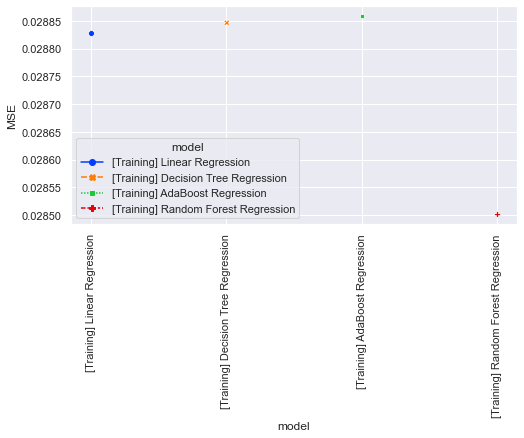

In [50]:
performance_plot(train_performance_df)

## Testing

In [51]:
test_performance_df = get_performance_df(test_evals)
test_performance_df

model       MAE       MSE      RMSE
0         [Testing] Linear Regression  0.072159  0.030190  0.173752
1  [Testing] Decision Tree Regression  0.071953  0.030192  0.173759
2       [Testing] AdaBoost Regression  0.071701  0.030206  0.173800
3  [Testing] Random Forest Regression  0.071788  0.030044  0.173332

<AxesSubplot:xlabel='model', ylabel='MSE'>

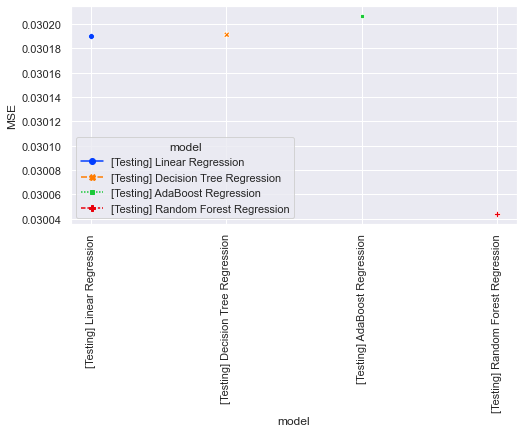

In [52]:
performance_plot(test_performance_df)

## Training vs Testing

In [53]:
train_test_perf_df = pd.concat([train_performance_df, test_performance_df]).reset_index(drop=True)
train_test_perf_df

model       MAE       MSE      RMSE
0         [Training] Linear Regression  0.070412  0.028828  0.169787
1  [Training] Decision Tree Regression  0.070364  0.028848  0.169846
2       [Training] AdaBoost Regression  0.069957  0.028858  0.169878
3  [Training] Random Forest Regression  0.069824  0.028502  0.168825
4          [Testing] Linear Regression  0.072159  0.030190  0.173752
5   [Testing] Decision Tree Regression  0.071953  0.030192  0.173759
6        [Testing] AdaBoost Regression  0.071701  0.030206  0.173800
7   [Testing] Random Forest Regression  0.071788  0.030044  0.173332

<AxesSubplot:xlabel='model', ylabel='MSE'>

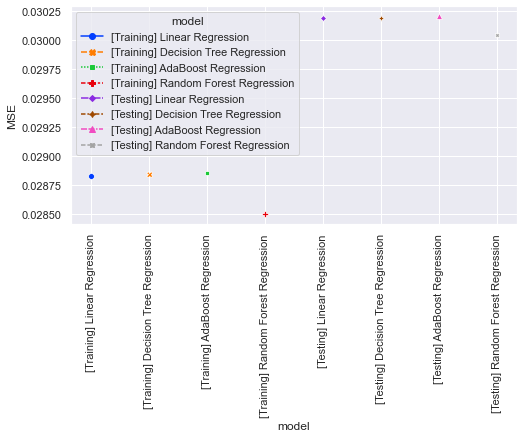

In [54]:
performance_plot(train_test_perf_df)

### Setup

In [94]:
def plot_features_predictions(evaluated: eva.EvaluatedModel):
    viz.bivariate_feature_plot(data=engineered_dataset.x_test, mode="scatter",
                              y_var=("Model predictions", pd.Series(evaluated.test_eval.y_pred)),
                              subplot_size=(5, 4),
                              width=3,
                              scatter_kwargs={"alpha": 0.8})

def plot_features_residuals(evaluation: eva.EvaluatedModel):
    viz.bivariate_feature_plot(data=engineered_dataset.x_test, mode="scatter",
                              y_var=("Model residuals", pd.Series(evaluation.test_eval.y_real - evaluation.test_eval.y_pred)),
                              subplot_size=(5, 4),
                              width=3,
                              scatter_kwargs={"alpha": 0.8})

## Predictions and Residuals

To understand the goodness of our models' prediction, there will be two types of plots for each model:
- **Features vs Model predictions**
- **Features vs Model residuals**

We will see how good the predictions are and how far they are from the expected values.

In [78]:
# for reference
y_train = engineered_dataset.y_train
y_test = engineered_dataset.y_test

pd.DataFrame(data={
    "Set": ["Training", "Testing"],
    "LogError Mean": [y_train.mean(), y_test.mean()],
    "LogError Variance": [y_train.var(), y_test.var()] })

Set  LogError Mean  LogError Variance
0  Training       0.016773           0.028937
1   Testing       0.016685           0.030262

### Linear Regression

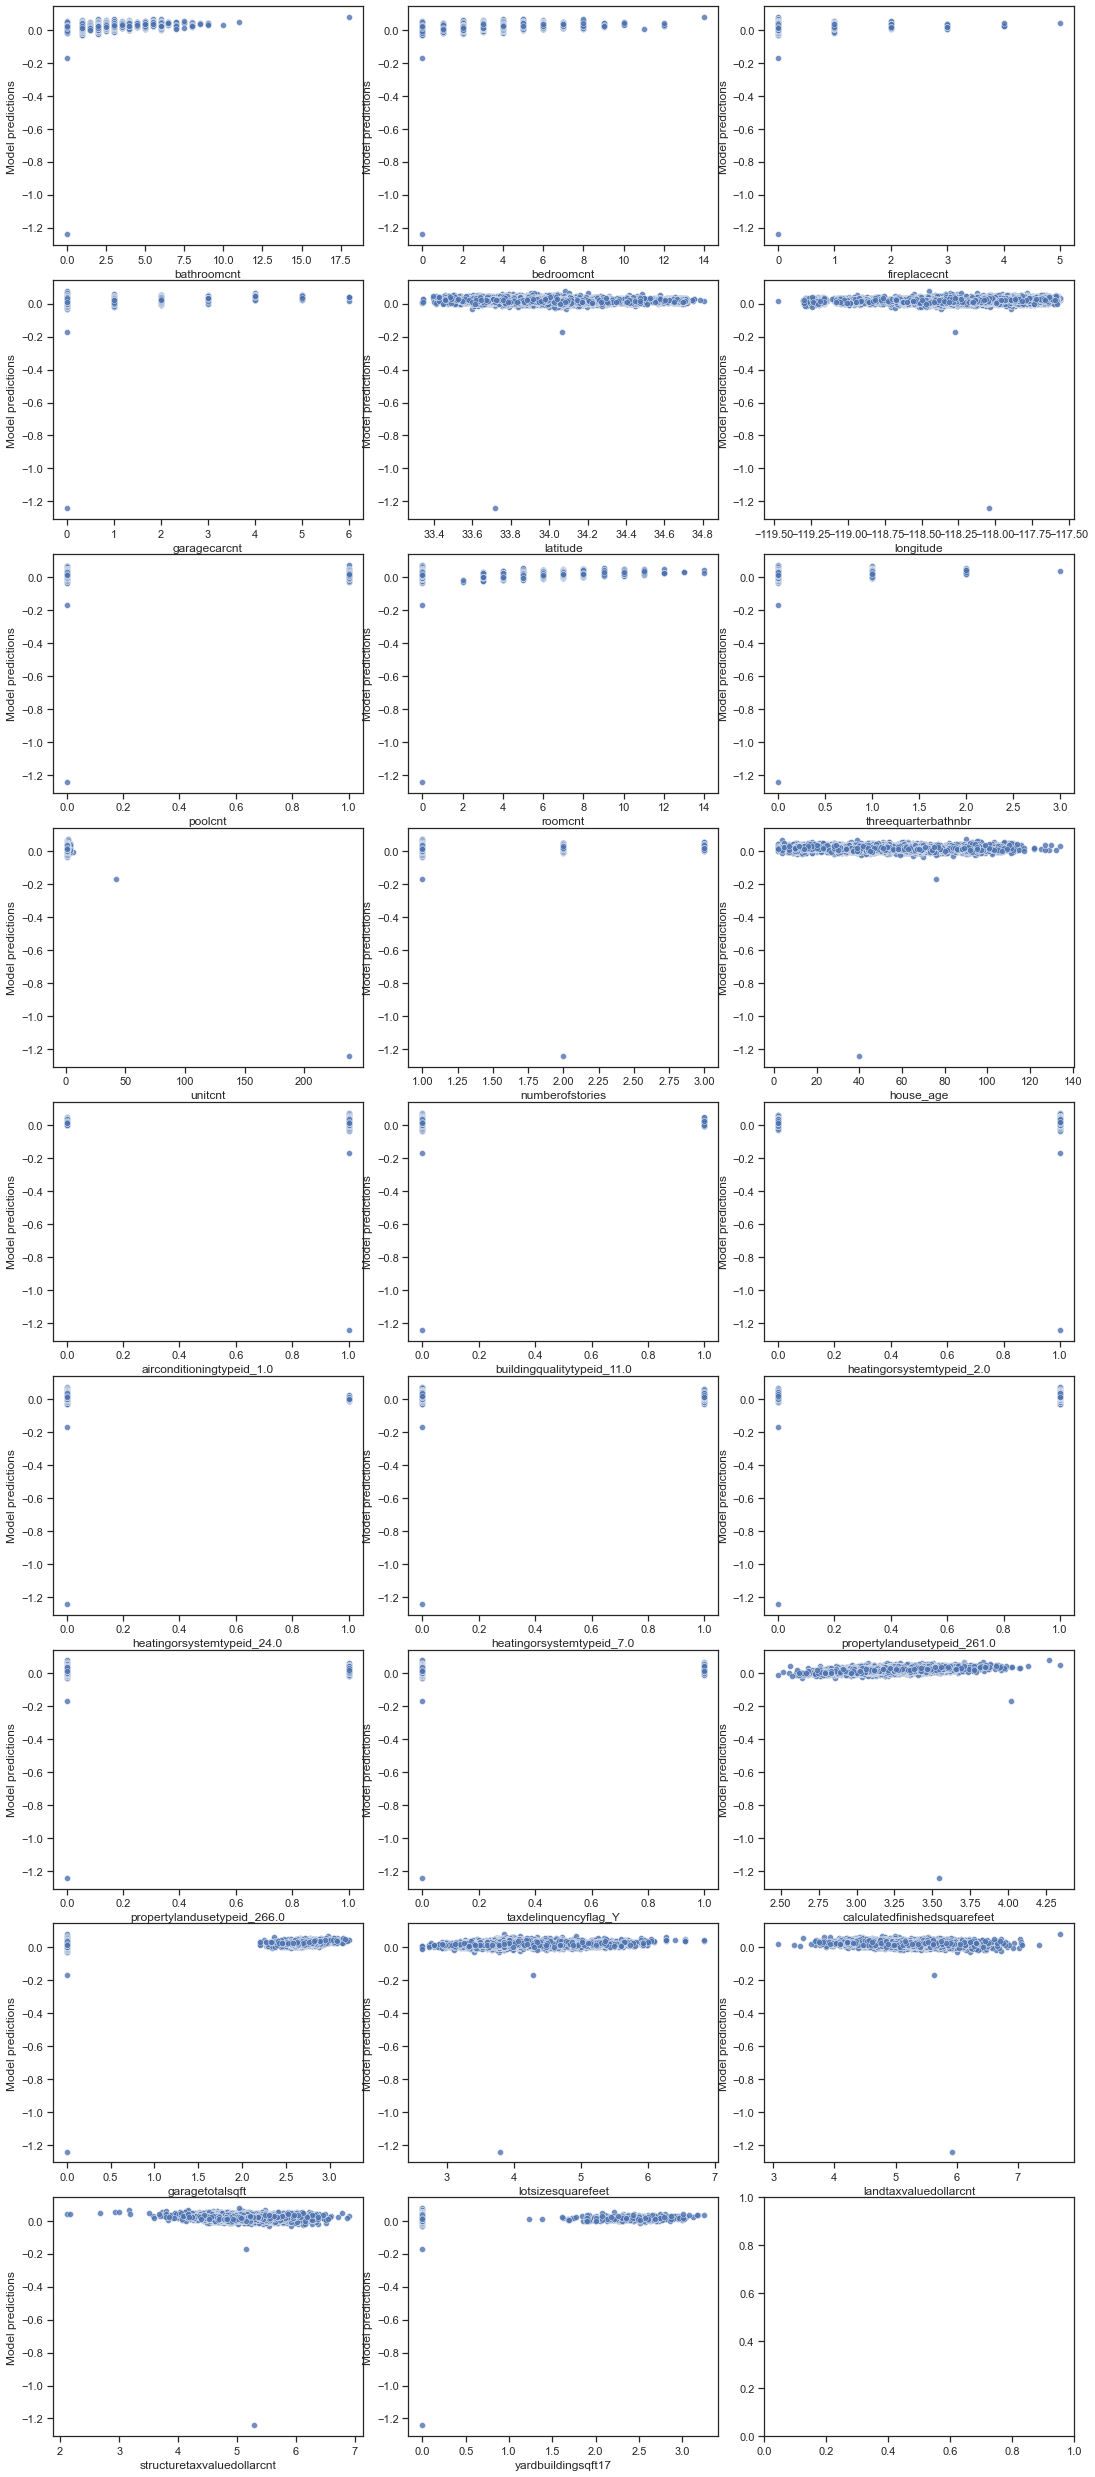

In [56]:
plot_features_predictions(lr_model)

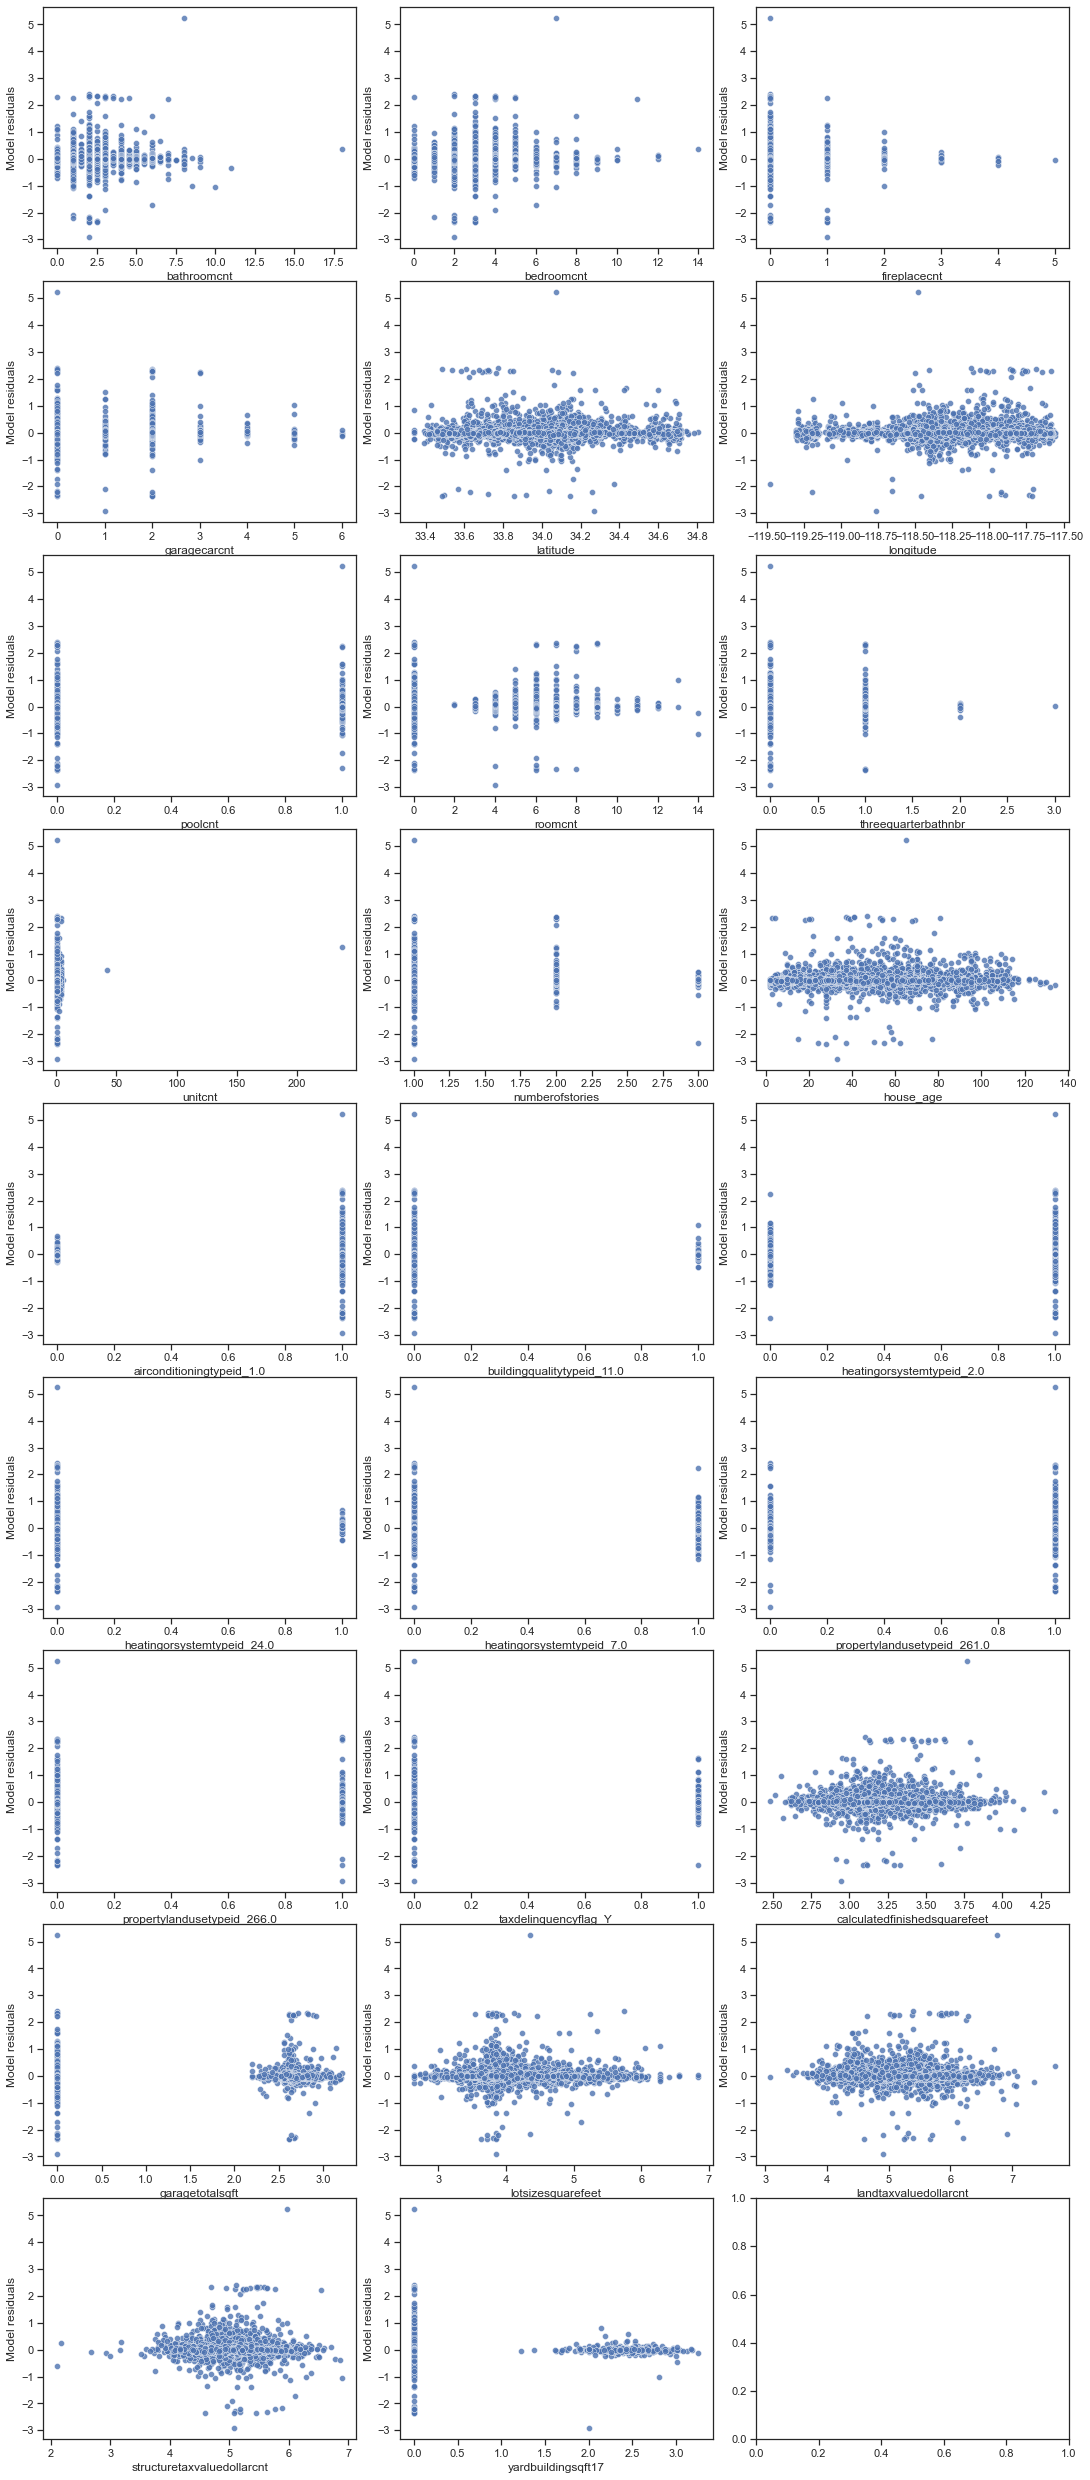

In [95]:
plot_features_residuals(lr_model)

### Decision Tree Regression

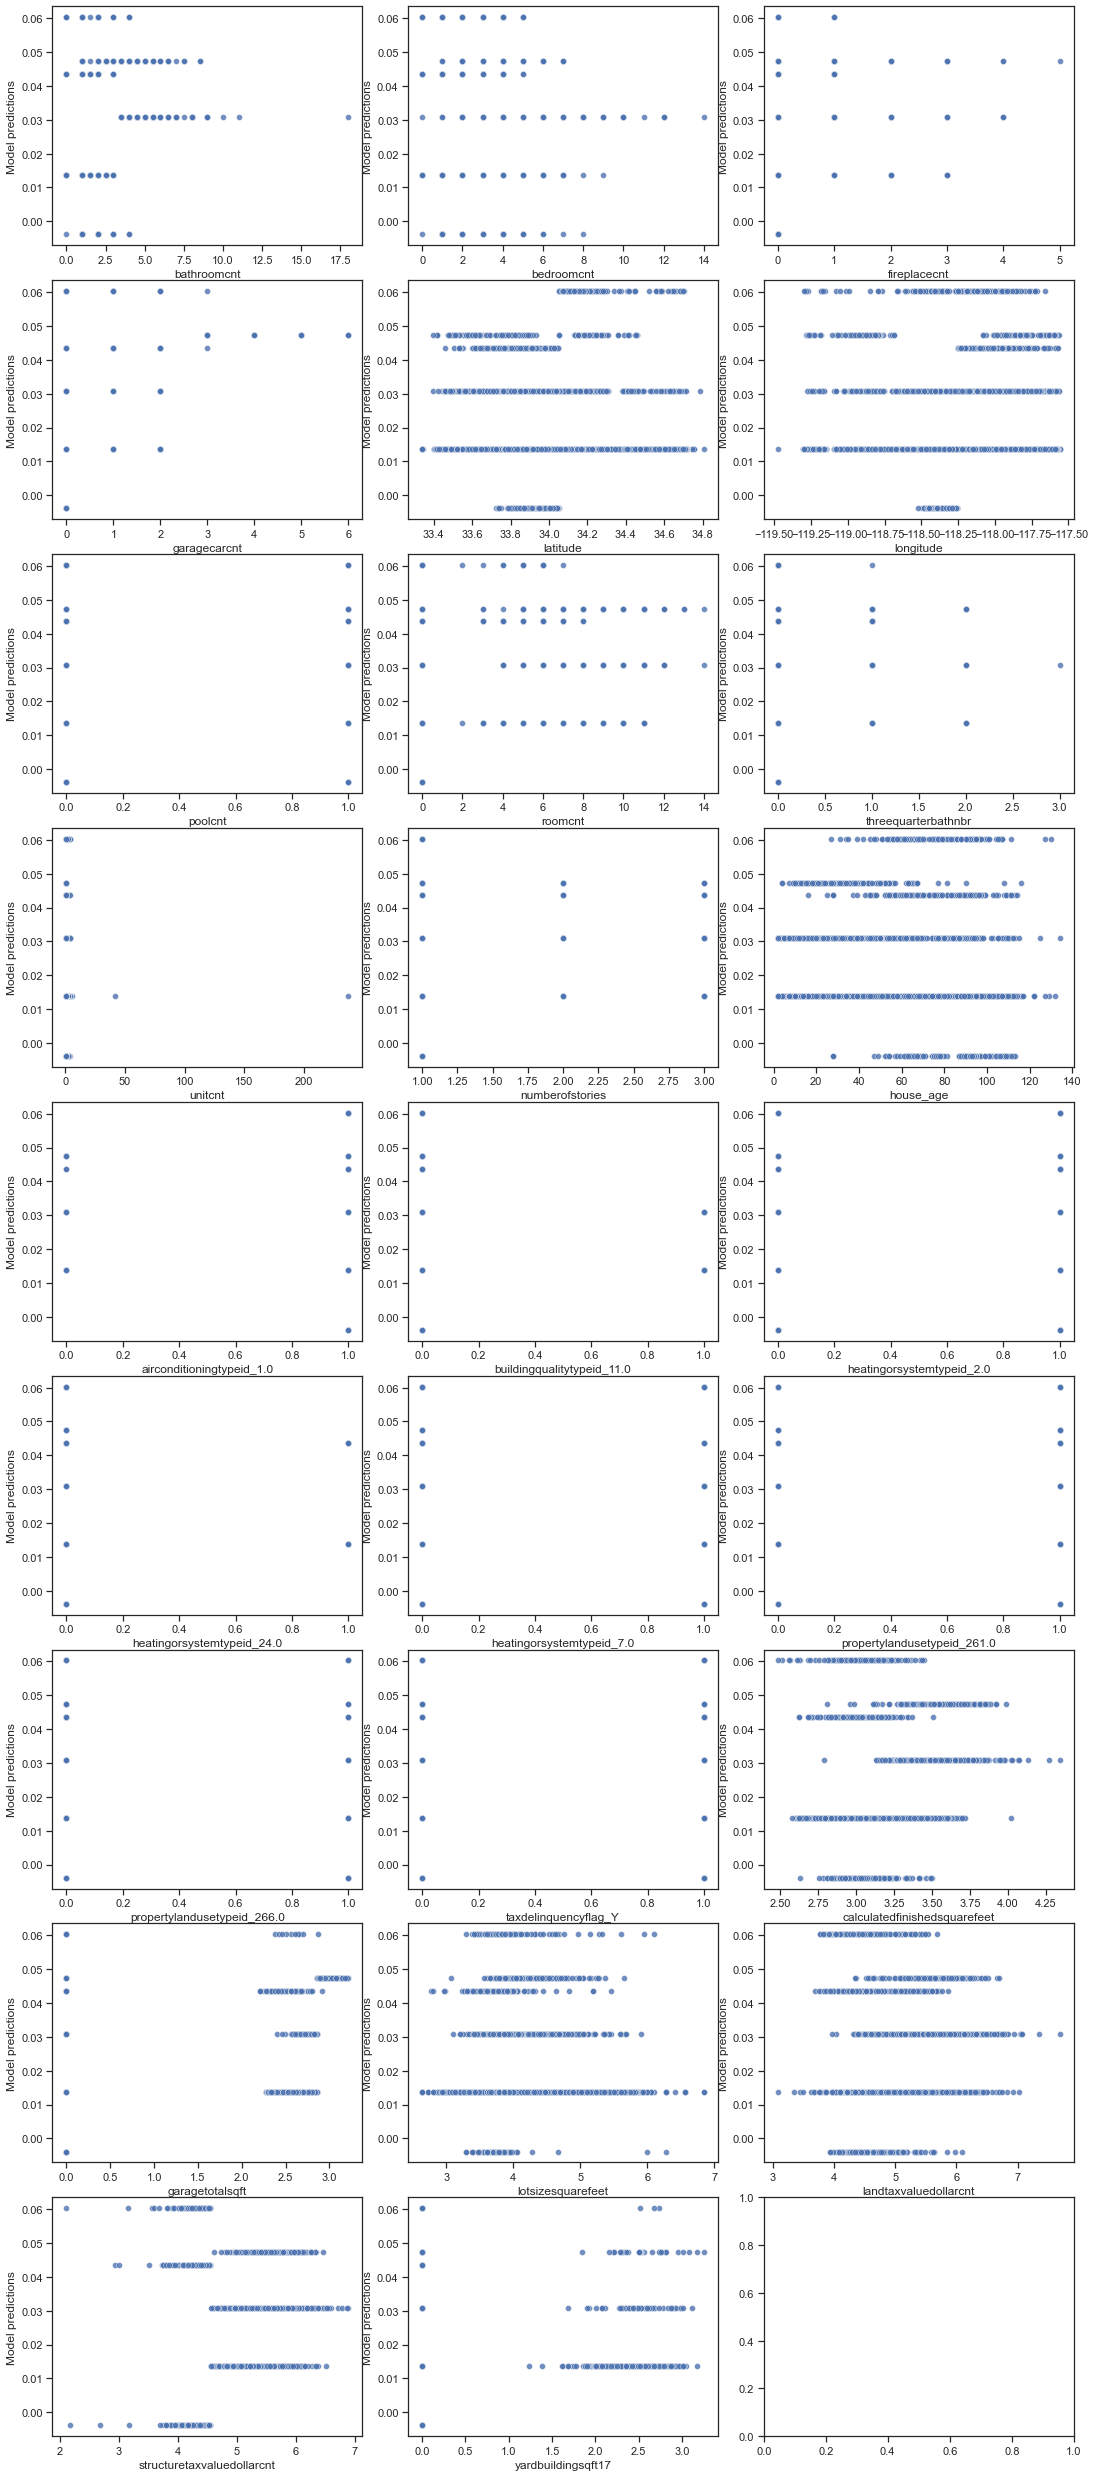

In [58]:
plot_features_predictions(dtr_model)

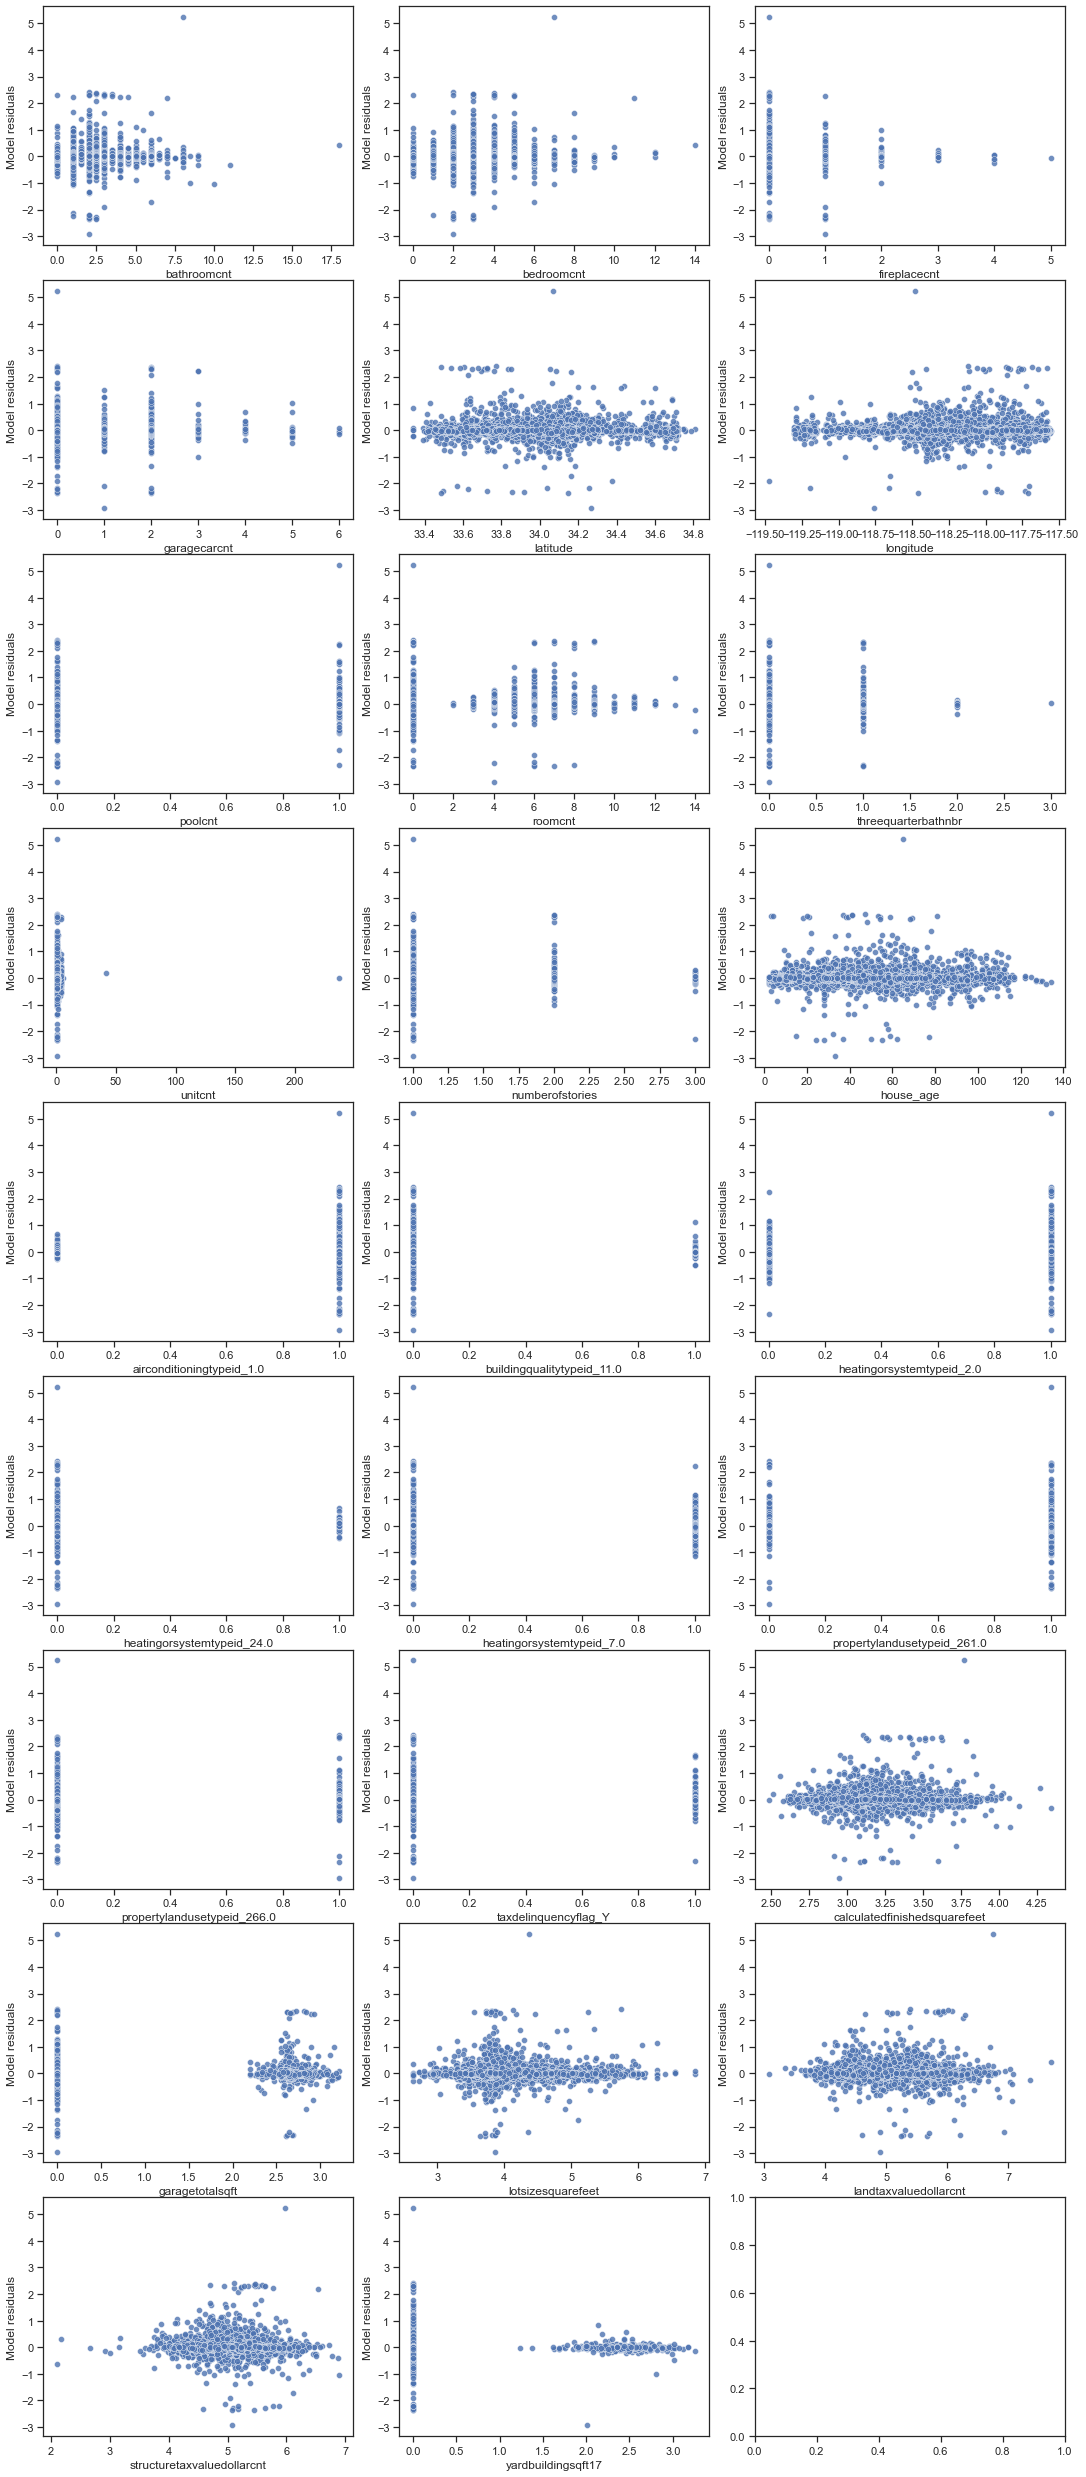

In [73]:
plot_features_residuals(dtr_model)

### AdaBoost Regression

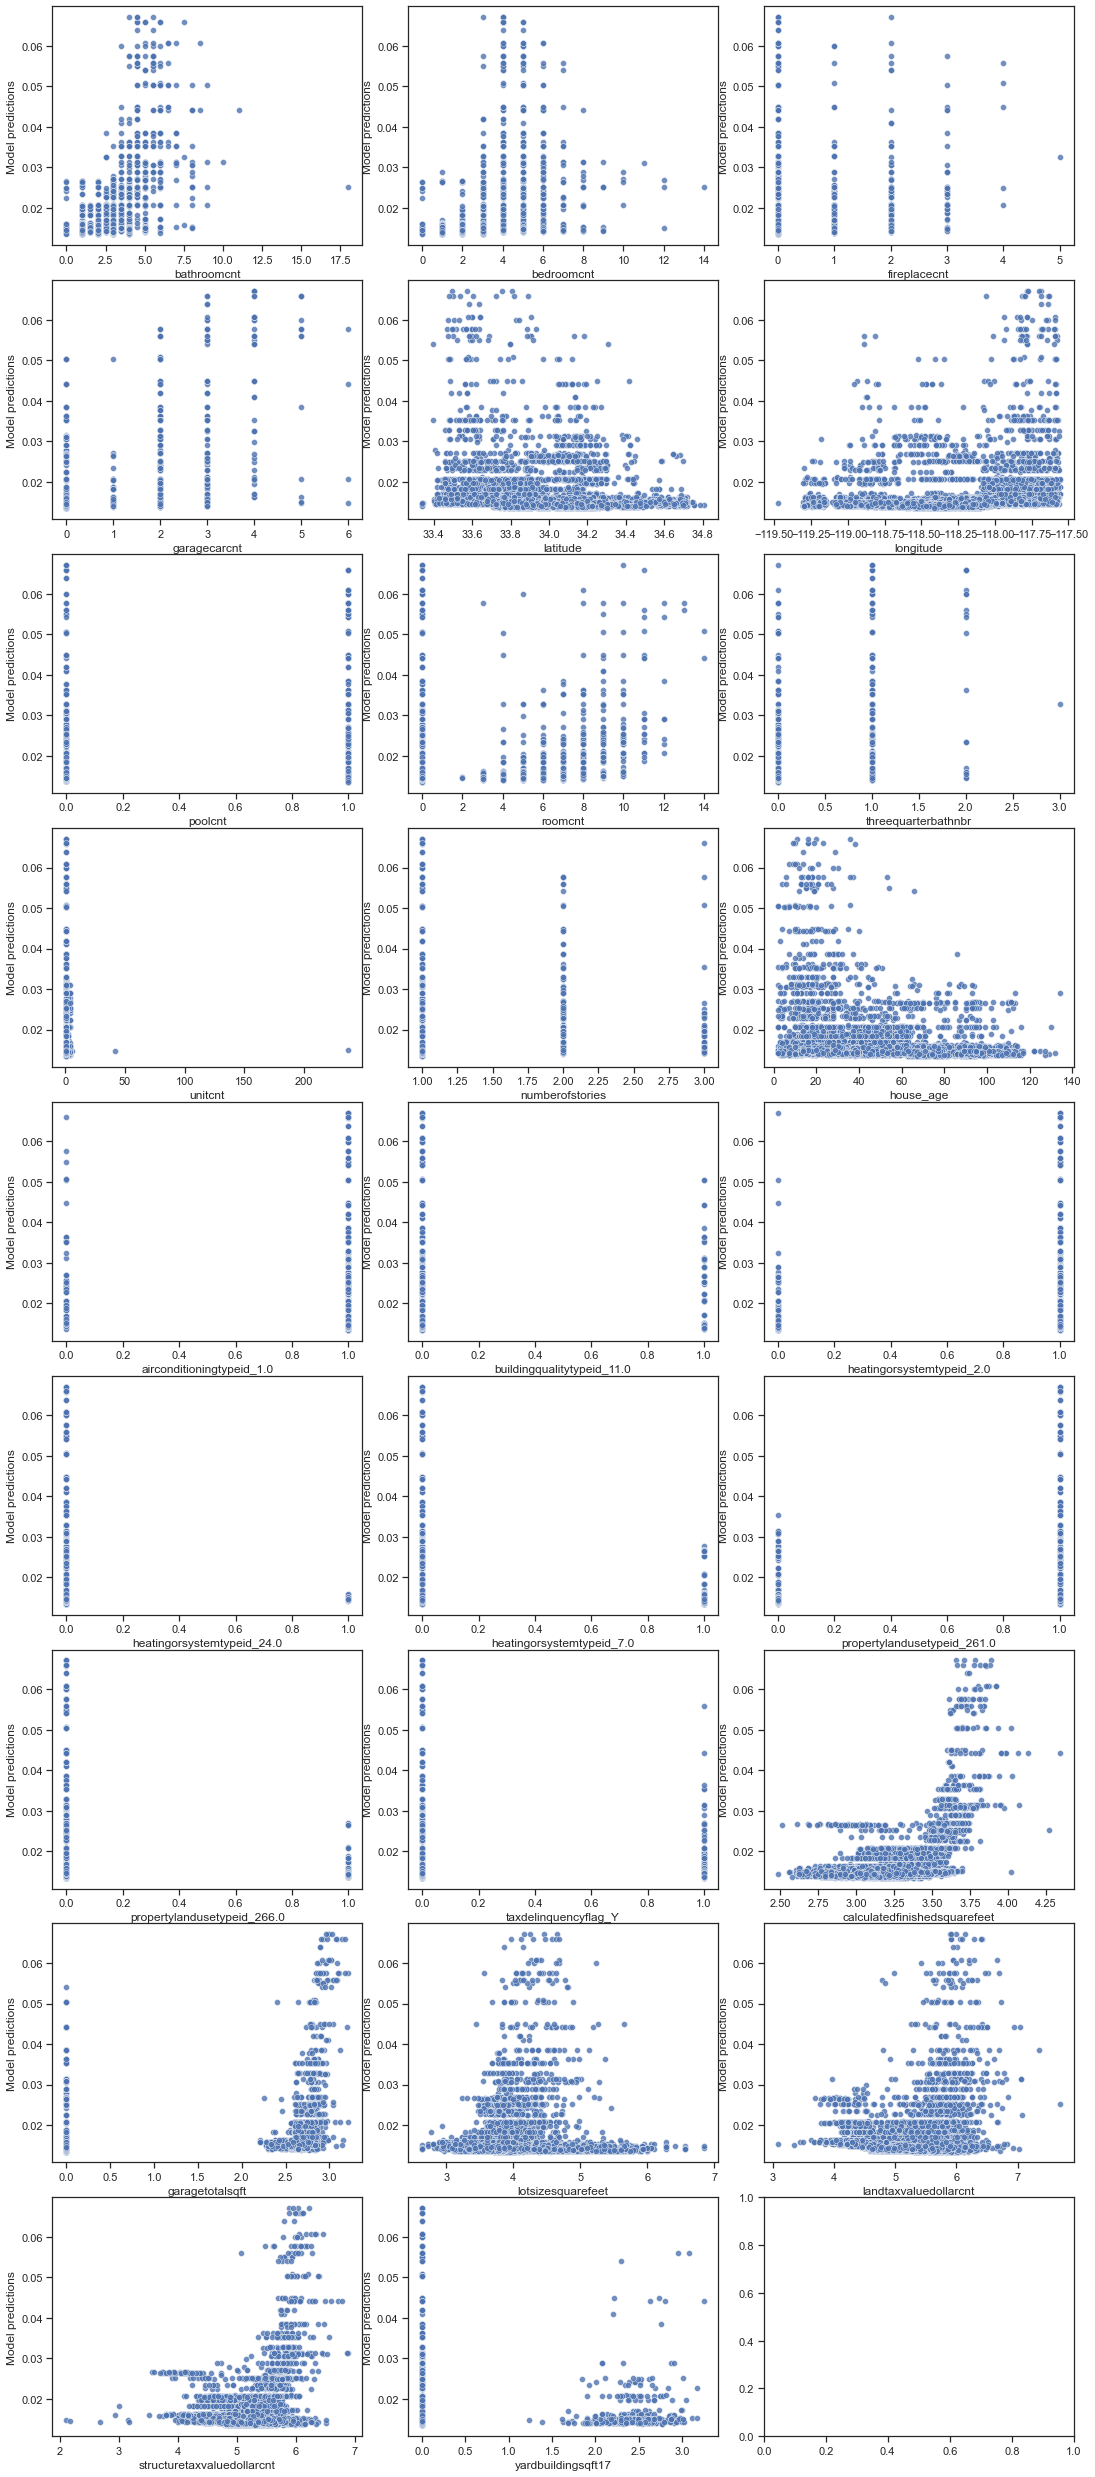

In [60]:
plot_features_predictions(abr_model)

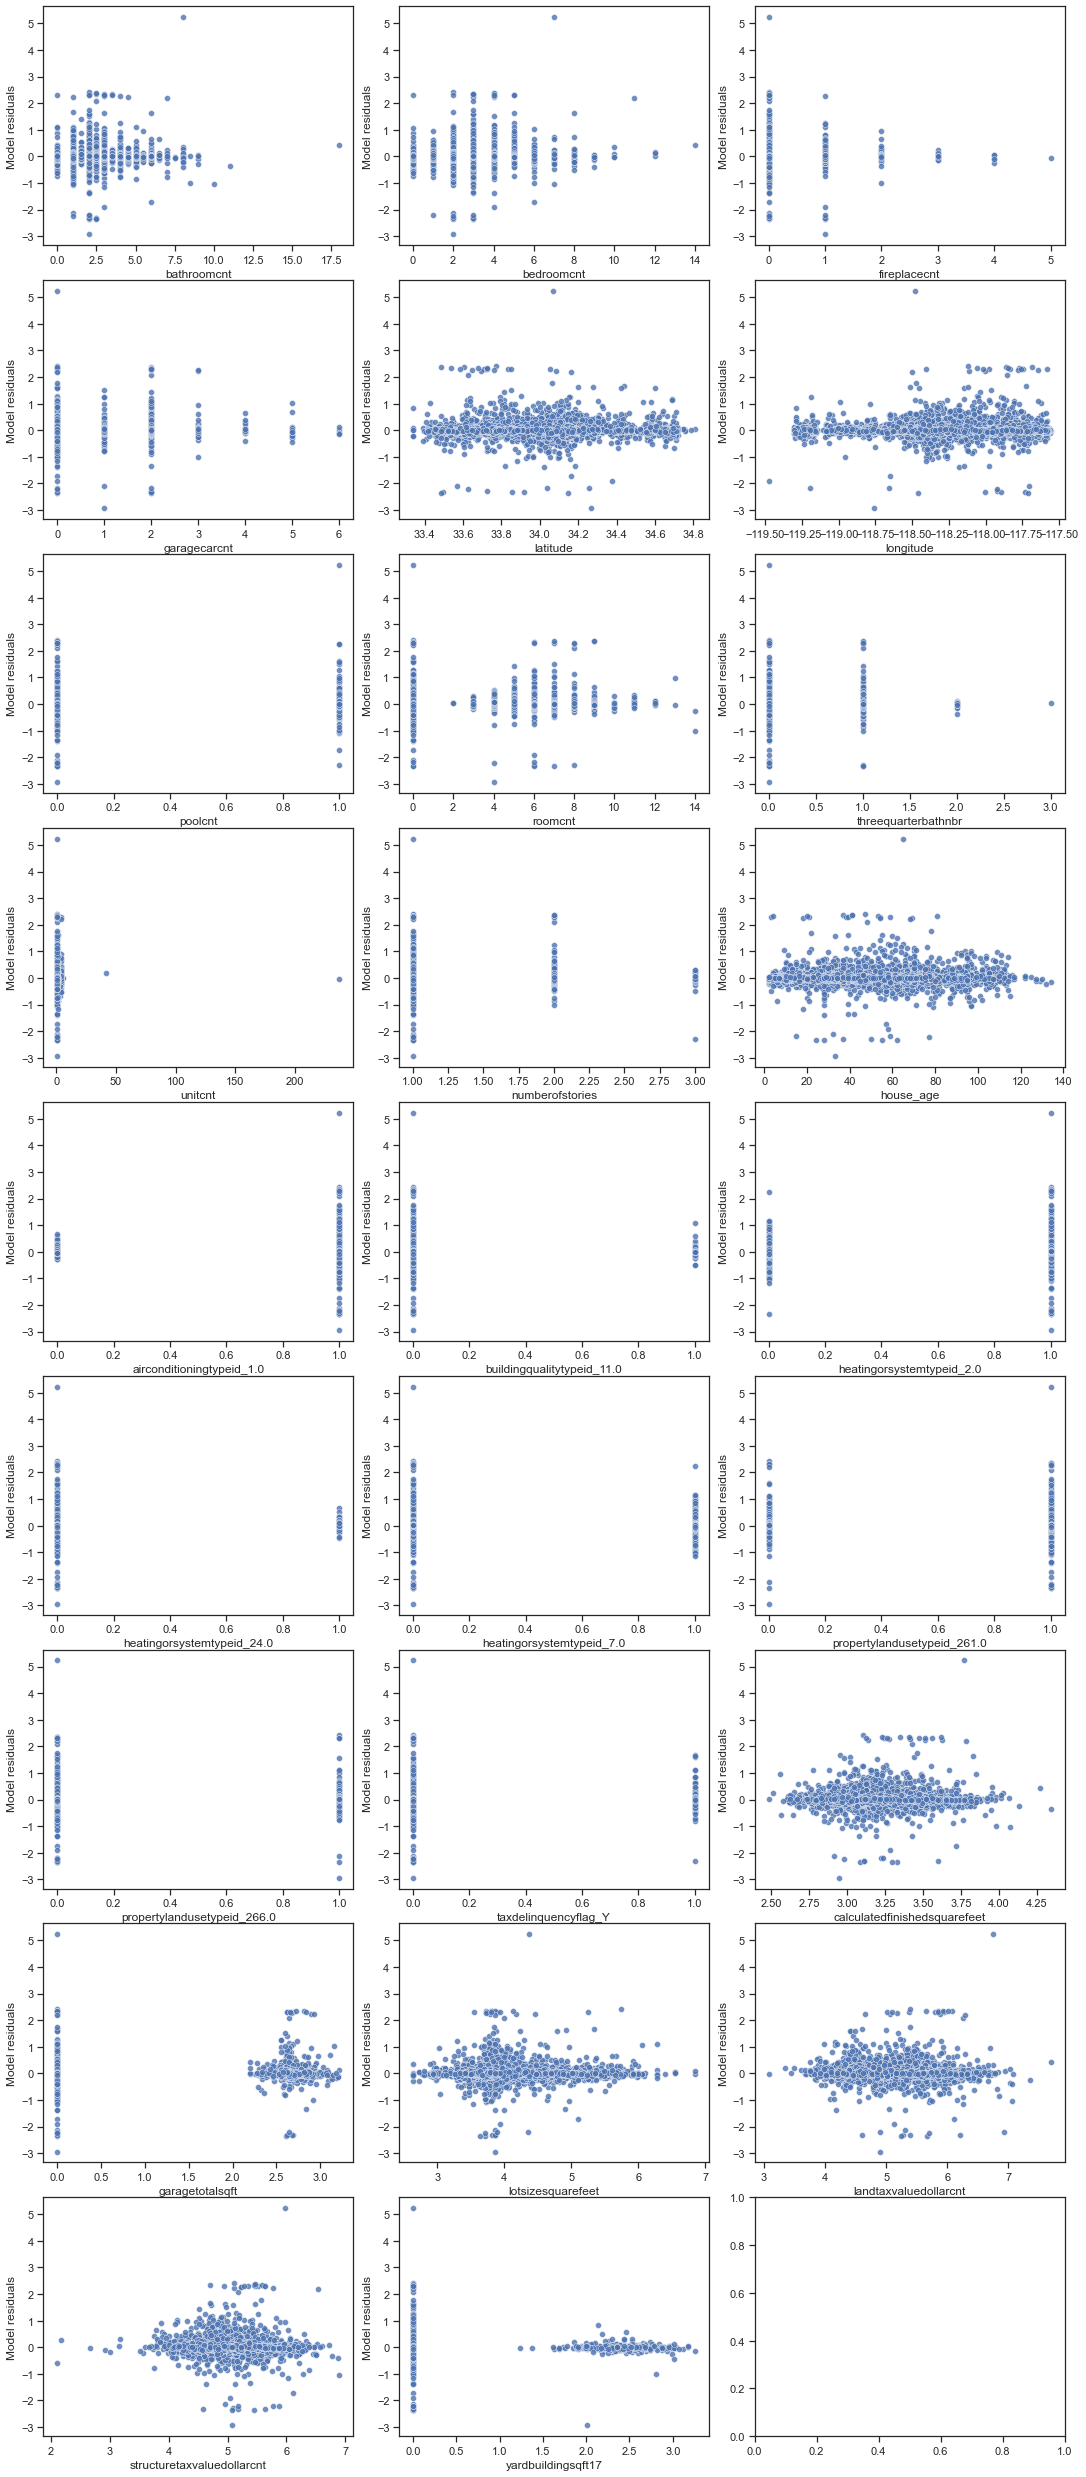

In [74]:
plot_features_residuals(abr_model)

### Random Forest Regression

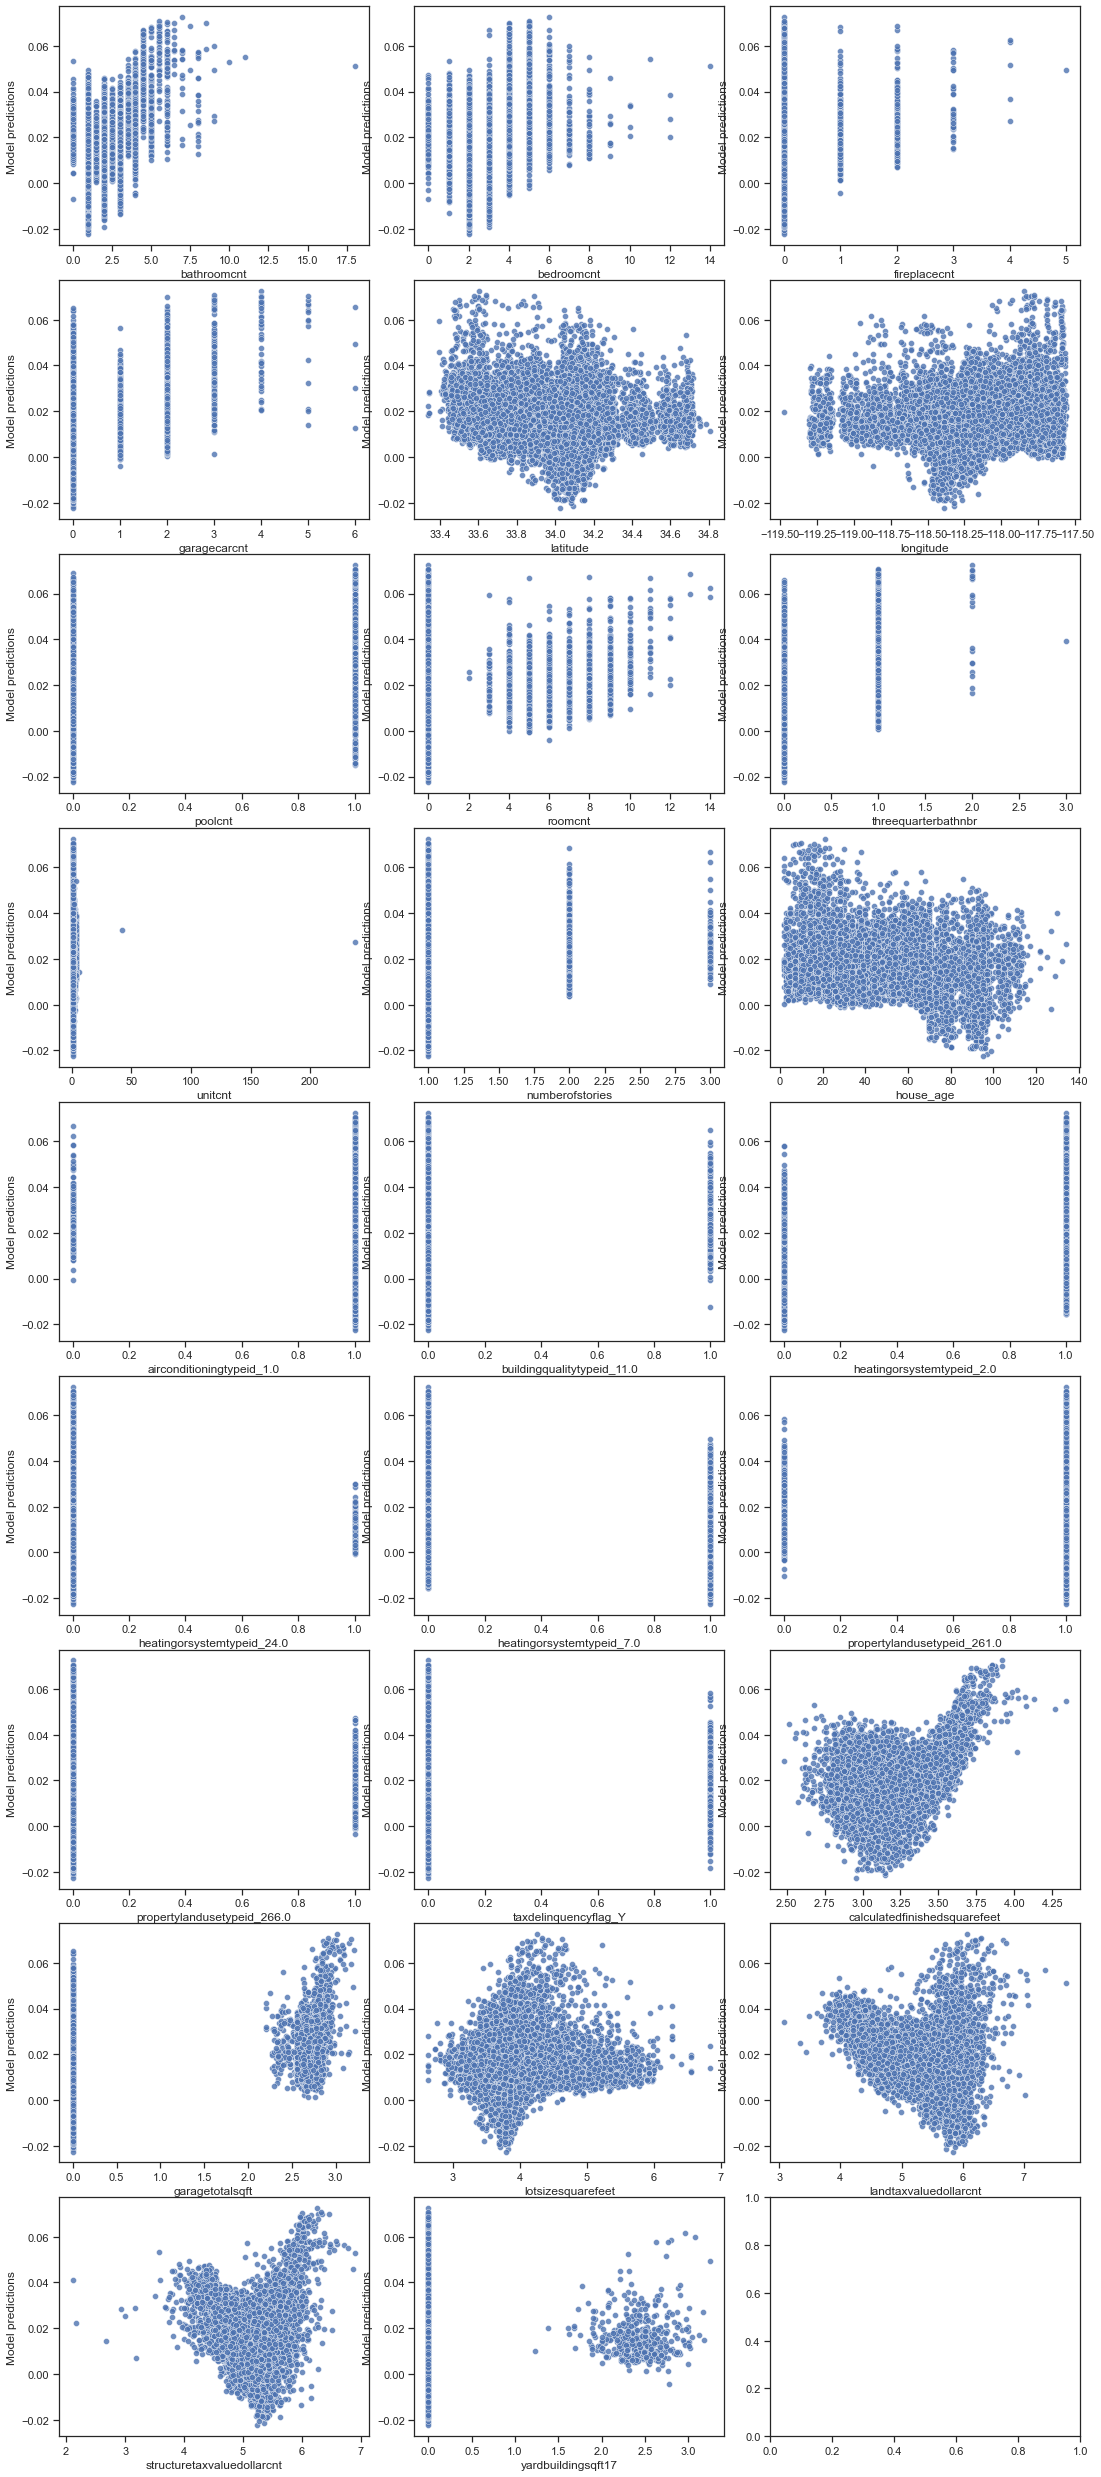

In [62]:
plot_features_predictions(rfr_model)

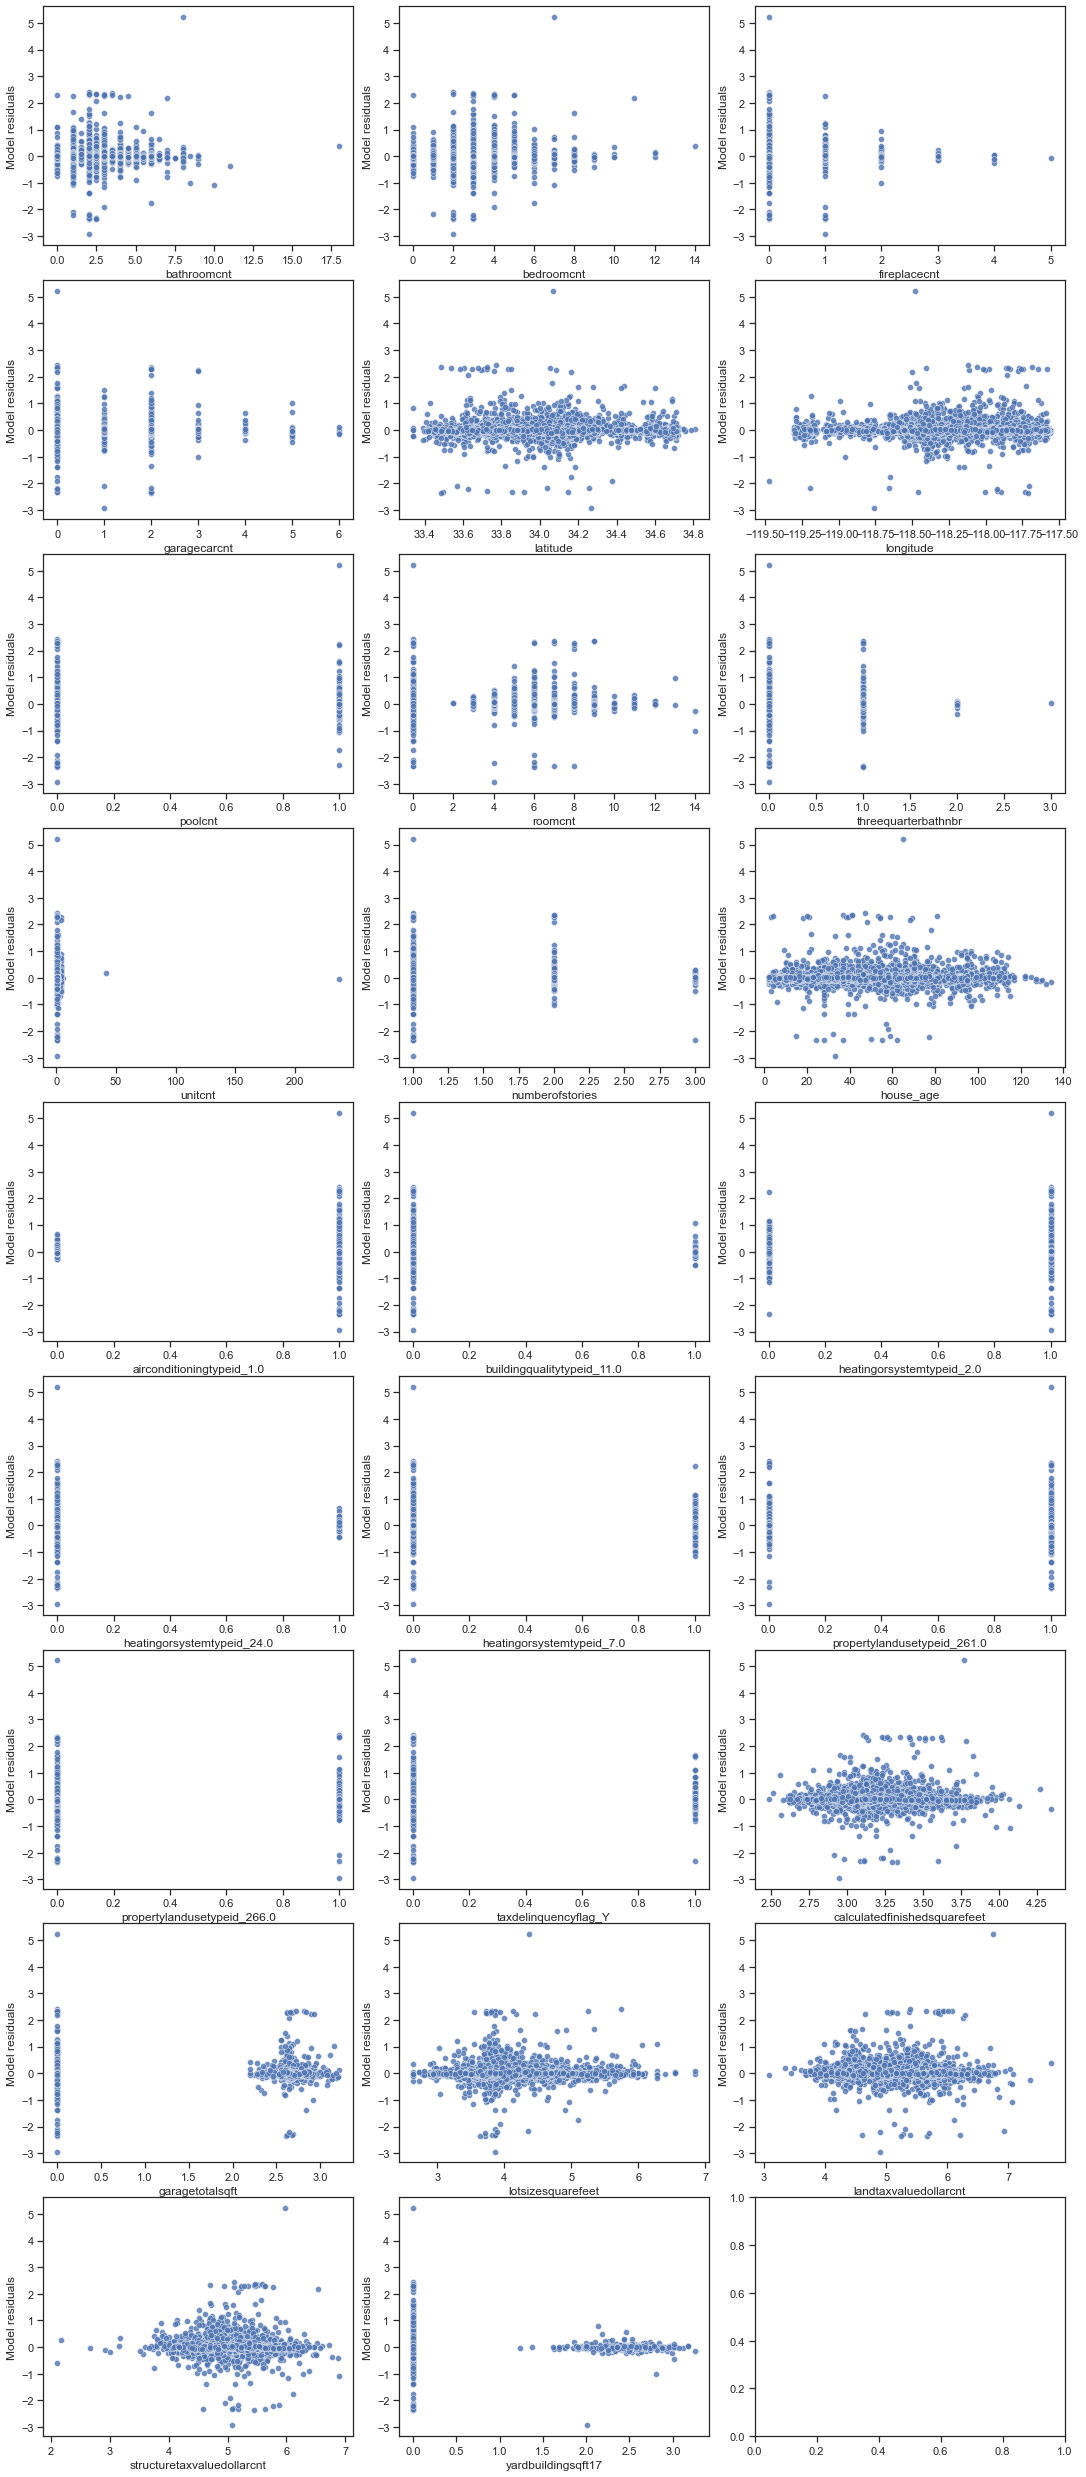

In [75]:
plot_features_residuals(rfr_model)

### Setup

In [159]:
def get_full_df(evaluated: eva.EvaluatedModel):
    full_df_test = engineered_dataset.x_test.copy()
    full_df_test["model predictions"] = evaluated.test_eval.y_pred
    full_df_test["real predictions"] = evaluated.test_eval.y_real
    full_df_test["squared error"] = np.square(evaluated.test_eval.y_real - evaluated.test_eval.y_pred)

    return full_df_test

def get_extreme_instances(evaluated: eva.EvaluatedModel):
    df = get_full_df(evaluated=evaluated)
    highest_error = df[df["squared error"] >= df["squared error"].quantile(0.97)]
    lowest_error = df[df["squared error"] <= df["squared error"].quantile(0.03)]

    return highest_error,lowest_error

In [154]:
def plot_extreme_instances_on_distribution(evaluated: eva.EvaluatedModel, var, cat):
    fig, axs = viz.plot_feature_distribution(data=engineered_dataset.x_test,var=var,subplot_size=(5, 5),cat = cat)
    most_wrong, most_correct = get_extreme_instances(evaluated=evaluated)

    for ax in axs.flatten():
        feature_name = ax.get_xlabel()
        if feature_name != "":
            x_worst = most_wrong[feature_name].values
            x_best = most_correct[feature_name].values

            # Points are drawn at mid height + an offset so they don't overlap
            y_min, y_max = ax.get_ylim()
            height = (abs(y_max) - abs(y_min))
            half_height = height / 2

            # Heights of worst and best on two different levels
            y_worst_height = half_height + 1
            y_best_height = half_height + 2

            # Also add gaussian noise to mitigate overlapping with the violin/box plot
            y_worst = [y_worst_height + np.random.normal(0, 0.05) for _ in range(len(x_worst))]
            y_best = [y_best_height + np.random.normal(0, 0.05) for _ in range(len(x_best))]

            # Plot the most wrong/correct values over the distribution plots
            # and assign them size in proportion to their wrongness/correctness
            worst_size = 40 * ((np.argsort(most_wrong["squared error"].values) + 1) / len(x_worst))
            best_size = 40 * ((np.argsort(-most_correct["squared error"].values) + 1) / len(x_best))

            ax.scatter(x=x_worst, y=y_worst, s=worst_size, c='red')
            ax.scatter(x=x_best, y=y_best, s=best_size, c='cyan')

    return fig, axs

In [155]:
def plot_extreme_instances_on_feature_vs_target(evaluated: eva.EvaluatedModel):
    fig, axs = viz.bivariate_feature_plot(data=engineered_dataset.x_test, mode="scatter",
                                          y_var=("Real logerror", pd.Series(engineered_dataset.y_test)),
                                          subplot_size=(5, 4),
                                          scatter_kwargs={"alpha":0.65})

    most_wrong, most_correct = get_extreme_instances(evaluated=evaluated)
    for ax in axs.flatten():
        feature_name = ax.get_xlabel()
        if feature_name != "":
            x_worst = most_wrong[feature_name].values
            x_best = most_correct[feature_name].values

            y_worst = most_wrong["real predictions"].values
            y_best = most_correct["real predictions"].values

            # Plot the most wrong/correct values over the distribution plots
            # and assign them size in proportion to their wrongness/correctness
            worst_size = 30 * ((np.argsort(most_wrong["squared error"].values) + 1) / len(x_worst))
            best_size = 30 * ((np.argsort(-most_correct["squared error"].values) + 1) / len(x_best))

            ax.scatter(x=x_worst, y=y_worst, s=worst_size, c='red')
            ax.scatter(x=x_best, y=y_best, s=best_size, c='cyan')

    return fig, axs

## Best and Worst Instances

Let's see if the best and worst predictions are due to some patterns.
There will be two types of plots for each model:
- **Distribution of best and worst predictions**
- **Extreme predictions vs true logerror**

In [96]:
num_vars_rfecv = [var for var in engineered_dataset.x_test.columns if len(engineered_dataset.x_test[var].unique()) > 10]
cat_vars_rfecv = [var for var in engineered_dataset.x_test.columns if var not in num_vars_rfecv]

### Linear Regression

(<Figure size 1800x1080 with 15 Axes>,
 array([[<AxesSubplot:xlabel='bathroomcnt'>,
         <AxesSubplot:xlabel='bedroomcnt'>,
         <AxesSubplot:xlabel='latitude'>,
         <AxesSubplot:xlabel='longitude'>, <AxesSubplot:xlabel='roomcnt'>],
        [<AxesSubplot:xlabel='house_age'>,
         <AxesSubplot:xlabel='calculatedfinishedsquarefeet'>,
         <AxesSubplot:xlabel='garagetotalsqft'>,
         <AxesSubplot:xlabel='lotsizesquarefeet'>,
         <AxesSubplot:xlabel='landtaxvaluedollarcnt'>],
        [<AxesSubplot:xlabel='structuretaxvaluedollarcnt'>,
         <AxesSubplot:xlabel='yardbuildingsqft17'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

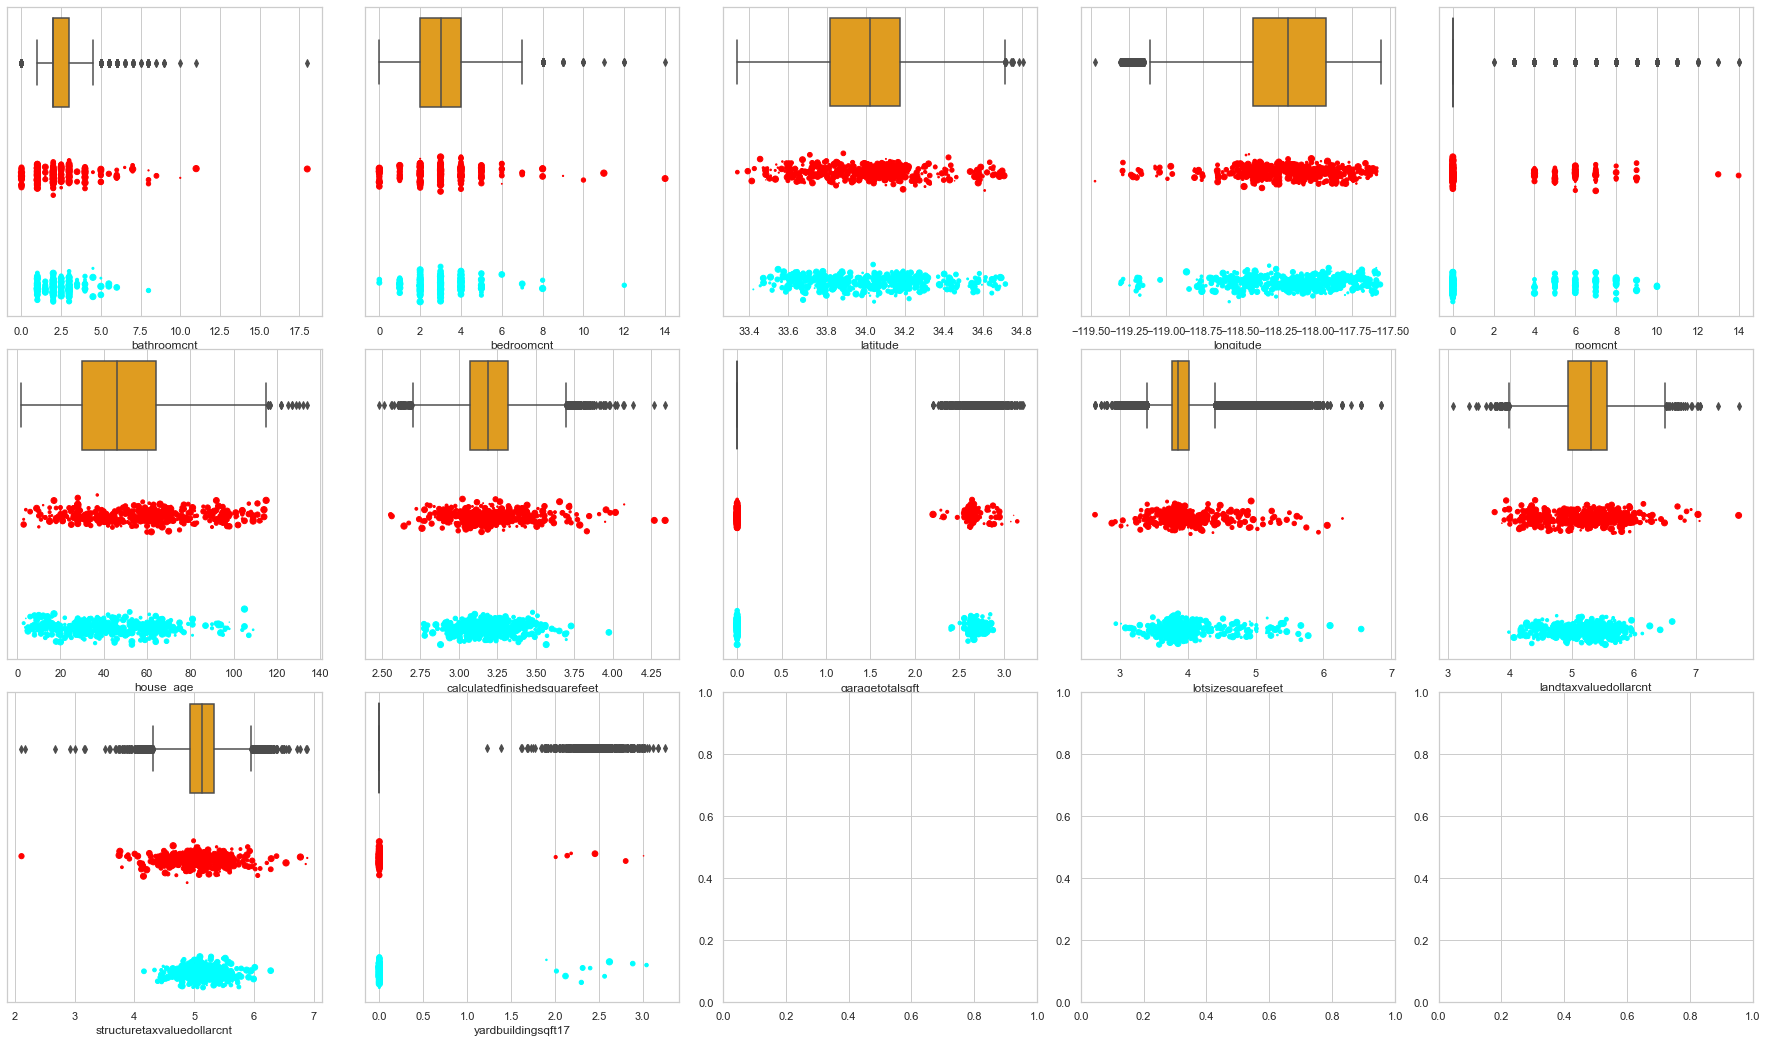

In [161]:
plot_extreme_instances_on_distribution(lr_model,num_vars_rfecv,cat = False)

(<Figure size 1800x1080 with 15 Axes>,
 array([[<AxesSubplot:xlabel='fireplacecnt', ylabel='frequency'>,
         <AxesSubplot:xlabel='garagecarcnt', ylabel='frequency'>,
         <AxesSubplot:xlabel='poolcnt', ylabel='frequency'>,
         <AxesSubplot:xlabel='threequarterbathnbr', ylabel='frequency'>,
         <AxesSubplot:xlabel='unitcnt', ylabel='frequency'>],
        [<AxesSubplot:xlabel='numberofstories', ylabel='frequency'>,
         <AxesSubplot:xlabel='airconditioningtypeid_1.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='buildingqualitytypeid_11.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='heatingorsystemtypeid_2.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='heatingorsystemtypeid_24.0', ylabel='frequency'>],
        [<AxesSubplot:xlabel='heatingorsystemtypeid_7.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='propertylandusetypeid_261.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='propertylandusetypeid_266.0', ylabel='frequency'>,
    

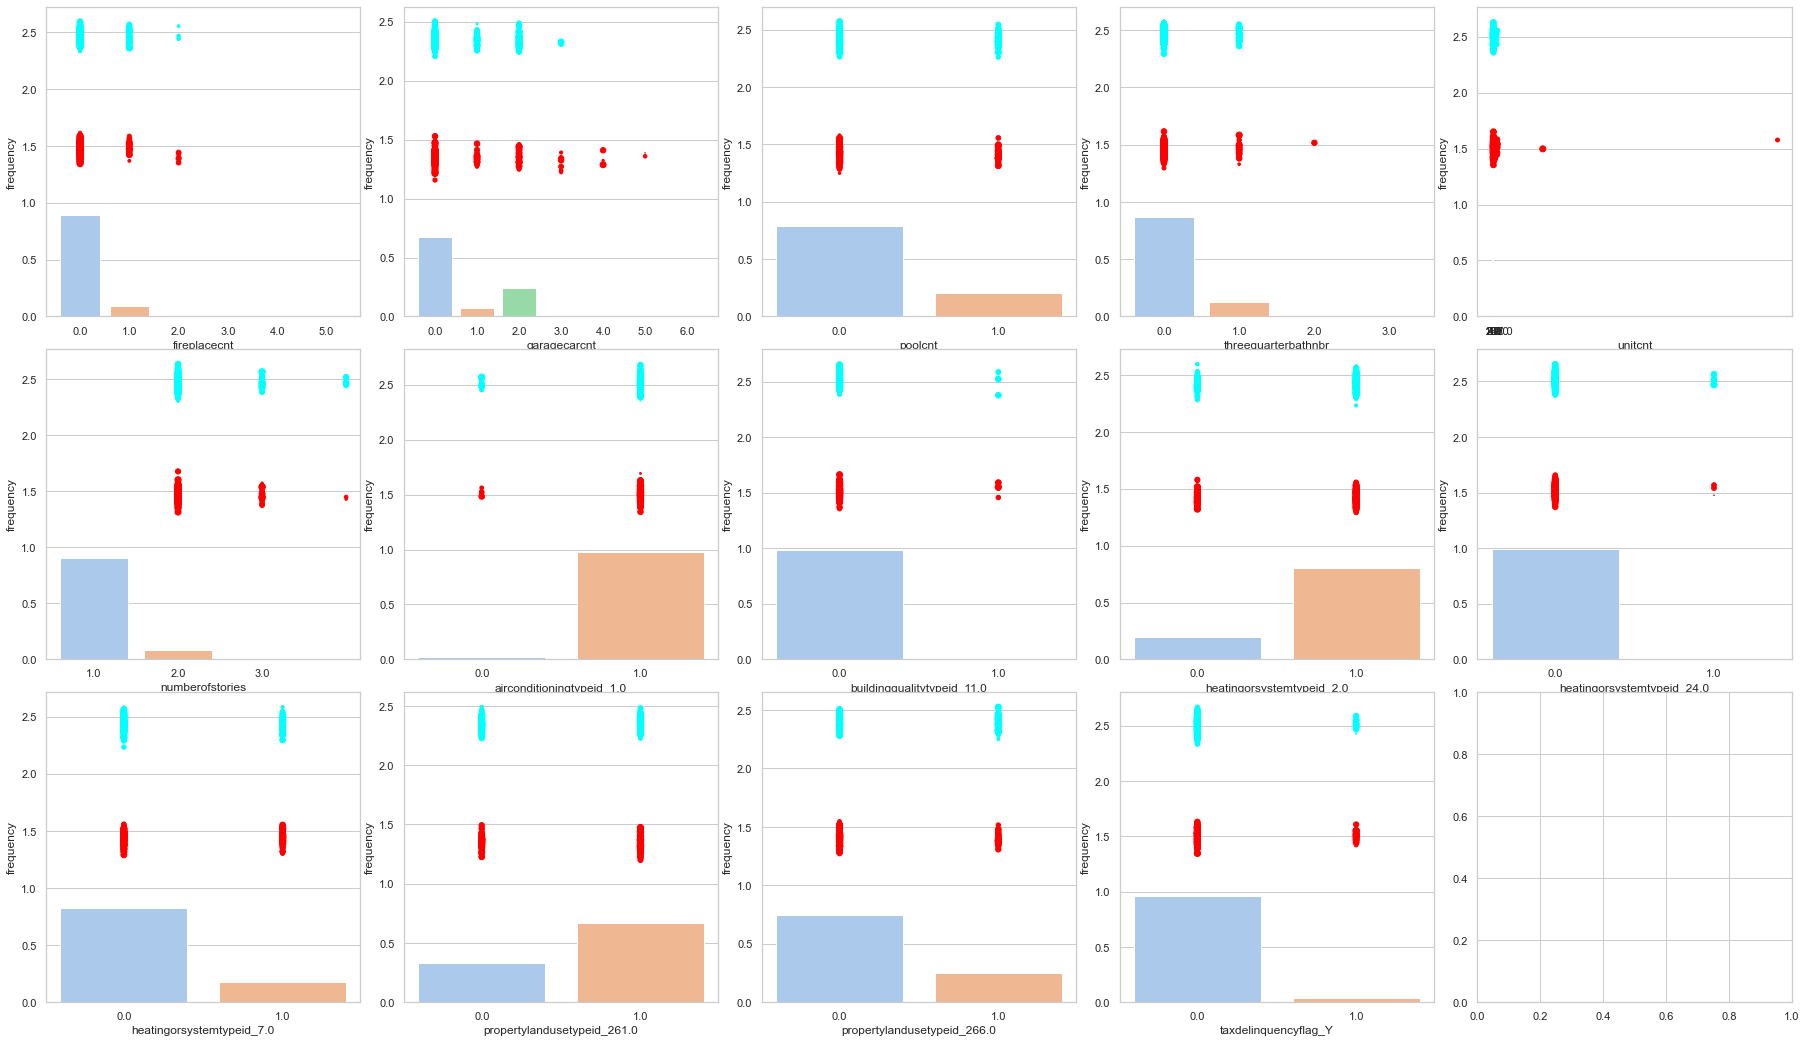

In [162]:
plot_extreme_instances_on_distribution(lr_model,cat_vars_rfecv,cat = True)

(<Figure size 1080x2592 with 27 Axes>,
 array([[<AxesSubplot:xlabel='bathroomcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='bedroomcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='fireplacecnt', ylabel='Real logerror'>],
        [<AxesSubplot:xlabel='garagecarcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='latitude', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='longitude', ylabel='Real logerror'>],
        [<AxesSubplot:xlabel='poolcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='roomcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='threequarterbathnbr', ylabel='Real logerror'>],
        [<AxesSubplot:xlabel='unitcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='numberofstories', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='house_age', ylabel='Real logerror'>],
        [<AxesSubplot:xlabel='airconditioningtypeid_1.0', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='buildingqualitytypeid_

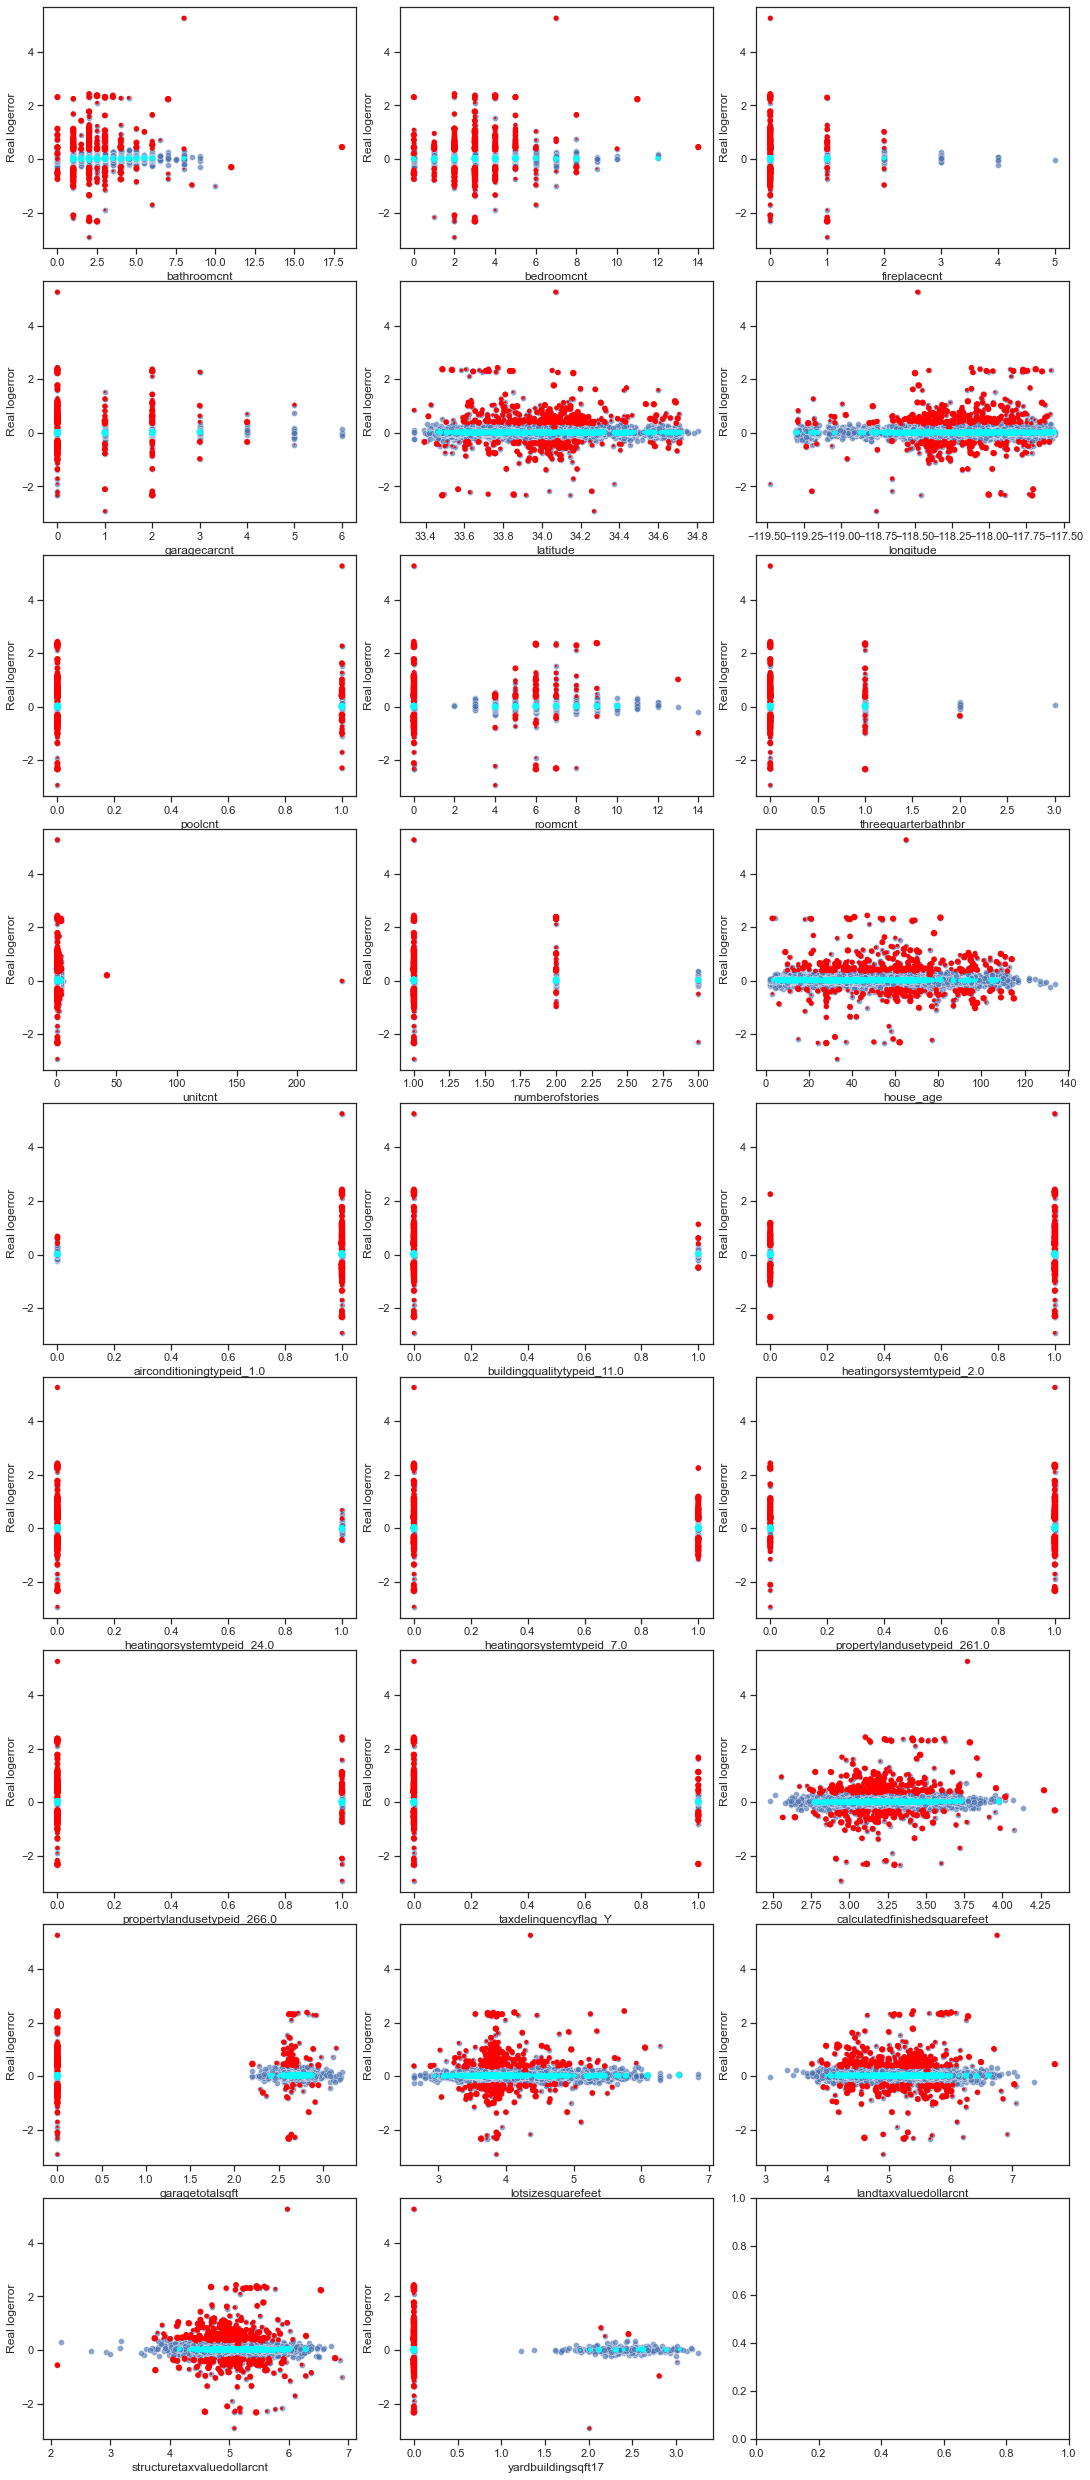

In [160]:
plot_extreme_instances_on_feature_vs_target(lr_model)

### Decision Tree Regression

In [ ]:
plot_extreme_instances_on_distribution(dtr_model,num_vars_rfecv,cat = False)

In [ ]:
plot_extreme_instances_on_distribution(dtr_model,cat_vars_rfecv,cat = True)

In [ ]:
plot_extreme_instances_on_feature_vs_target(dtr_model)

### AdaBoost Regression

In [ ]:
plot_extreme_instances_on_distribution(abr_model,num_vars_rfecv,cat = False)

In [ ]:
plot_extreme_instances_on_distribution(abr_model,cat_vars_rfecv,cat = True)

In [ ]:
plot_extreme_instances_on_feature_vs_target(abr_model)

### Random Forest Regression

In [ ]:
plot_extreme_instances_on_distribution(rfr_model,num_vars_rfecv,cat = False)

In [ ]:
plot_extreme_instances_on_distribution(rfr_model,cat_vars_rfecv,cat = True)

In [ ]:
plot_extreme_instances_on_feature_vs_target(rfr_model)

# Conclusion

1. I have performed all the feature engineering steps necessary to ensure the dataset is ready to be fed into Machine Learning algorithms.

2. After Pre-processing and Feature Engineering the raw dataset we splitted the dataset into train and test sets.

3. Performed Feature scaling on data for better performance.

4. Trained multiple models using different ML regression algorithms on dataset.

5. Appleied Performance metrics such as MAE, MSE, RMSE to find out best prediction model.

6. With the help of GridSearch CV we found out best estimator with least Root mean squred error.

7. Saved best predictor in .pickle format for future predictions.

8. Done prediction on test data and saved predictions into .csv file.